# Pet Food Customer Orders Data Insights

* [Basic exploration of data](#exploration)
* [Attribute construction](#attributecon)
* [Data preparation](#dataprep)
* [Data labelling](#datalabel)
* [Visualisation](#visualisation)

## Modelling
* [Prepare Data before Implementing Feature Selection Methods](#dataprepmodel)
* [Feature selection methods](#featureselectionmethods)
* [Models](#models)
* [Models for 1order/ 1+orders classification](#secondmodel)




In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

<a id='exploration'></a>
## Basic exploration of data

In [3]:
df = pd.read_csv('pet_food_customer_orders.csv')
df.head()

,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,pet_food_tier,pet_signup_datetime,pet_allergen_list,pet_fav_flavour_list,...,dental_treat_packs,wet_food_textures_in_order,total_web_sessions,total_web_sessions_since_last_order,total_minutes_on_website,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order,last_customer_support_ticket_date,customer_support_ticket_category
0,10574848487411271014,4466839344031767293,2,1.0,1.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,6,4,101,32,0,0,2019-03-16 09:10:12+00:00,proactive
1,10574848487411271014,4466839344031767293,1,NaN,NaN,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,NaN,2,1,69,3,0,0,2019-03-16 09:10:12+00:00,proactive
2,10574848487411271014,4466839344031767293,8,7.0,7.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,18,0,184,0,0,0,2019-10-26 06:10:13+00:00,account
3,10574848487411271014,4466839344031767293,4,3.0,3.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,13,6,130,15,0,0,2019-04-23 06:28:12+00:00,account
4,10574848487411271014,4466839344031767293,9,8.0,8.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,19,1,184,0,0,0,2019-10-26 06:10:13+00:00,account


In [4]:
df.shape

(49042, 36)

In [5]:
df['order_payment_date'].min()

'2018-12-30 00:00:00.000000000'

In [6]:
df['order_payment_date'].max()

'2020-03-30 00:00:00.000000000'

- Dataset contains order details of customers and profile data of their pets 
- There are 49042 transactions in the dataset covering the 15 month period from 2018-12-30 to 2020-03-30
- Data is available on approx 36 transactional and profile features 

In [7]:
df.describe()

,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,kibble_kcal,wet_kcal,total_order_kcal,wet_trays,wet_food_discount_percent,premium_treat_packs,dental_treat_packs,total_web_sessions,total_web_sessions_since_last_order,total_minutes_on_website,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order
count,4.904200e+04,4.904200e+04,49042.000000,12788.000000,14372.000000,49042.000000,49042.000000,49042.000000,49042.000000,12788.000000,49042.000000,49042.000000,49042.000000,49042.000000,49042.000000,49042.000000,49042.000000,49042.000000
mean,9.237652e+18,9.252460e+18,3.506545,2.914998,3.156137,19764.538353,861.480384,20790.572013,5.432140,0.149554,0.087354,0.275641,7.962298,2.036479,383.583969,92.716468,0.045410,0.030158
std,5.273450e+18,5.296804e+18,2.864754,2.312705,2.487372,13255.889361,1903.275965,13382.099355,10.888737,0.252432,0.471183,0.951677,9.732376,2.619178,822.173863,291.262819,0.316929,0.246854
min,1.969421e+15,3.629657e+14,1.000000,1.000000,1.000000,597.112000,0.000000,1481.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.748268e+18,4.648948e+18,1.000000,1.000000,1.000000,10127.275000,0.000000,11099.017000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000
50%,9.196879e+18,9.318042e+18,3.000000,2.000000,2.000000,16423.389500,0.000000,17540.532000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,59.000000,2.000000,0.000000,0.000000
75%,1.380478e+19,1.378622e+19,5.000000,4.000000,4.000000,26392.896500,973.350000,27645.782250,8.000000,0.499971,0.000000,0.000000,11.000000,3.000000,433.000000,17.000000,0.000000,0.000000
max,1.844219e+19,1.844234e+19,20.000000,20.000000,20.000000,168958.655000,55914.900000,168958.655000,248.000000,2.000235,23.000000,20.000000,124.000000,51.000000,23734.000000,8203.000000,9.000000,9.000000


In [8]:
sns.set(rc={'figure.figsize':(12,9)})

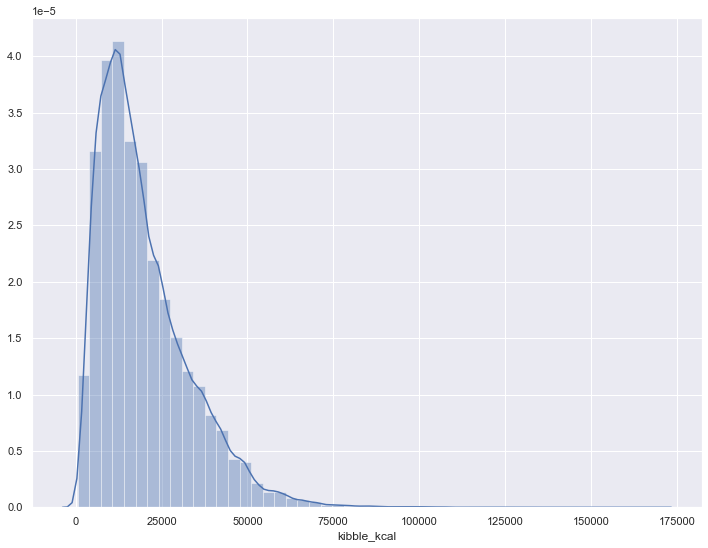

In [9]:
sns.distplot(df['kibble_kcal'])
# might need to do scaling for such variables

In [10]:
df.describe(include=np.object)

,pet_food_tier,pet_signup_datetime,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,gender,pet_breed_size,signup_promo,dry_food_brand_pre_tails,pet_life_stage_at_order,order_payment_date,wet_tray_size,wet_food_textures_in_order,last_customer_support_ticket_date,customer_support_ticket_category
count,49042,49042,10758,21022,23716,49042,49042,49042,42670,49042,49042,49042,12788,10280,10241
unique,3,12508,200,16,15,2,5,13,136,4,435,4,7,3493,27
top,superpremium,1970-01-01 00:00:01.555327958,beef dairy egg soya wheat,Chicken,digestion,male,small,Null & Default,Harringtons,mature,2020-01-26 00:00:00.000000000,None,gravy jelly pate,2019-01-02 15:18:03+00:00,account
freq,28531,30,2046,5513,7827,26710,15751,12059,4488,29133,524,36254,5723,28,2148


In [11]:
df['customer_id'].nunique()

11168

In [12]:
df['pet_id'].nunique()

13087

- The dataset contains 11168 unique customers and 13087 unique pets
- Average number of web sessiosis approx 8 with the average amount of time spent before last order being around 90 minutes
- Most common pet_food_tier in the dataset is superpremium
- pet_signup_datetime is set an an arbitrary demo number not indicative of the actual datetime
- There are 136 brands pre-tails in the dataset. Harrightons gets the most mention
- Most pets are at mature stage

In [13]:
df.columns

Index(['customer_id', 'pet_id', 'pet_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_signup_datetime', 'pet_allergen_list',
       'pet_fav_flavour_list', 'pet_health_issue_list', 'neutered', 'gender',
       'pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
       'dry_food_brand_pre_tails', 'pet_life_stage_at_order',
       'order_payment_date', 'kibble_kcal', 'wet_kcal', 'total_order_kcal',
       'wet_trays', 'wet_food_discount_percent', 'wet_tray_size',
       'premium_treat_packs', 'dental_treat_packs',
       'wet_food_textures_in_order', 'total_web_sessions',
       'total_web_sessions_since_last_order', 'total_minutes_on_website',
       'total_minutes_on_website_since_last_order', 'total_wet_food_updates',
       'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date',
       'customer_support_ticket_category'],
      dtype='object')

In [14]:
# selected some variables for aggregation of data around them

shortlisted_vars = ['wet_food_order_number', 'pet_has_active_subscription', 'pet_food_tier', 'neutered', 
                    'gender', 'pet_breed_size', 'ate_wet_food_pre_tails', 'pet_life_stage_at_order', 'wet_tray_size', 
                    'wet_food_textures_in_order', 'customer_support_ticket_category']

In [15]:
for var in shortlisted_vars:
    print(df.groupby(var).size())

wet_food_order_number
1.0     4181
2.0     3035
3.0     1890
4.0     1300
5.0      888
6.0      567
7.0      348
8.0      191
9.0      120
10.0      76
11.0      57
12.0      40
13.0      33
14.0      20
15.0      14
16.0      10
17.0       8
18.0       4
19.0       4
20.0       2
dtype: int64
pet_has_active_subscription
False    16147
True     32895
dtype: int64
pet_food_tier
mid             11518
premium          8993
superpremium    28531
dtype: int64
neutered
False    21529
True     27513
dtype: int64
gender
female    22332
male      26710
dtype: int64
pet_breed_size
giant      1108
large     10894
medium    14657
small     15751
toy        6632
dtype: int64
ate_wet_food_pre_tails
False    31258
True     17784
dtype: int64
pet_life_stage_at_order
half_maturity     8712
mature           29133
senior            7810
weaning           3387
dtype: int64
wet_tray_size
150g     7635
300g     5152
Both        1
None    36254
dtype: int64
wet_food_textures_in_order
gravy               1925

#### Some insights from above data manipulation

- Wet order number 1 appears 4181 times in the dataset. Effectively means that 4181 pets have ordered wet food at least once (customers ordering for their pets)
- Wet order number 2 appears 3035 times in dataset. Effectively means that 3035 have made a follow on second order for wet food
- Of the 49042 transactions, approx 33 thousand concern pets who have active subscription
- Of the 49042 transactions, approx 31 thousand concern pets who did not eat wet food prior to Tails
- Of the 49042 transactions, approx 28 thousand concern pets who come under food tier 'superpremium'
- Most popular wet food texture is 'gravy jelly pate'
- In terms of tray size, 150g has a slight edge over 300g in terms of number of orders

In [16]:
df.isnull().sum()

customer_id                                      0
pet_id                                           0
pet_order_number                                 0
wet_food_order_number                        36254
orders_since_first_wet_trays_order           34670
pet_has_active_subscription                      0
pet_food_tier                                    0
pet_signup_datetime                              0
pet_allergen_list                            38284
pet_fav_flavour_list                         28020
pet_health_issue_list                        25326
neutered                                         0
gender                                           0
pet_breed_size                                   0
signup_promo                                     0
ate_wet_food_pre_tails                           0
dry_food_brand_pre_tails                      6372
pet_life_stage_at_order                          0
order_payment_date                               0
kibble_kcal                    

<a id='attributecon'></a>
# Further Feature Extraction / Attribute construction

#### Attribute: 'number_of_pets_in_house' 
- since some customers have multiple pets

In [17]:
# Shows how many pets each customer has. Some have multiple pets. 
# Pet population in a household may impact the nature of orders placed for each pet. Hence potentially an important explanatory variable

df.groupby('customer_id')['pet_id'].nunique().reset_index()

,customer_id,pet_id
0,1969421412923625,1
1,2441192939363434,1
2,4392737593978297,1
3,5748999654342296,1
4,6434555296330718,1
...,...,...
11163,18441026500672502036,1
11164,18441098910908230444,1
11165,18441543271887053070,2
11166,18441562157298841918,1


In [18]:
pet_population = pd.DataFrame(df.groupby('customer_id')['pet_id'].nunique().reset_index())

In [19]:
pet_population.shape

(11168, 2)

In [20]:
pet_population.columns=['customer_id', 'number_of_pets_in_house']

In [21]:
pet_population.sample(5)

,customer_id,number_of_pets_in_house
677,1141507889719040340,1
2,4392737593978297,1
7870,13023486156259438448,1
6159,10327892290646560044,1
2434,4156601479531757140,1


In [22]:
# update the df with the new attribute
df_updated = pd.merge(df,pet_population, on='customer_id')

In [23]:
df_updated.head().T

,0,1,2,3,4
customer_id,10574848487411271014,10574848487411271014,10574848487411271014,10574848487411271014,10574848487411271014
pet_id,4466839344031767293,4466839344031767293,4466839344031767293,4466839344031767293,4466839344031767293
pet_order_number,2,1,8,4,9
wet_food_order_number,1,NaN,7,3,8
orders_since_first_wet_trays_order,1,NaN,7,3,8
pet_has_active_subscription,True,True,True,True,True
pet_food_tier,superpremium,superpremium,superpremium,superpremium,superpremium
pet_signup_datetime,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819
pet_allergen_list,NaN,NaN,NaN,NaN,NaN
pet_fav_flavour_list,Chicken,Chicken,Chicken,Chicken,Chicken


### Attribute 'communication_gap' (time between last_customer_support_ticket_date and the order_payment_date)
- With the assumption that a communication gap may impact the freqency or other nature of orders placed

In [24]:
df_updated['last_customer_support_ticket_date']= df_updated['last_customer_support_ticket_date'].astype('datetime64[ns]')
df_updated['order_payment_date']= df_updated['order_payment_date'].astype('datetime64[ns]')

In [25]:
df_updated['communication_gap'] = ((df_updated['order_payment_date'].dt.date -  df_updated['last_customer_support_ticket_date'].dt.date)/np.timedelta64(1, 'D'))

In [26]:
df_updated.head().T

,0,1,2,3,4
customer_id,10574848487411271014,10574848487411271014,10574848487411271014,10574848487411271014,10574848487411271014
pet_id,4466839344031767293,4466839344031767293,4466839344031767293,4466839344031767293,4466839344031767293
pet_order_number,2,1,8,4,9
wet_food_order_number,1,NaN,7,3,8
orders_since_first_wet_trays_order,1,NaN,7,3,8
pet_has_active_subscription,True,True,True,True,True
pet_food_tier,superpremium,superpremium,superpremium,superpremium,superpremium
pet_signup_datetime,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819
pet_allergen_list,NaN,NaN,NaN,NaN,NaN
pet_fav_flavour_list,Chicken,Chicken,Chicken,Chicken,Chicken


In [27]:
df_updated['last_customer_support_ticket_date'].isnull().sum()

38762

- of the 49 thousand transactions almost 39 thousand have no last_customer_support_ticket_date
- when aggregated against each pet, of the 13087 unique pets the mean of comm_gap is absent for 10178
- Suggest we still use a marker for whether there was some communication because there is at least customer_suppot_ticket data on 3000 pets which is like 25% of the pets

In [28]:
df_updated['communication_gap'].describe()

count    10280.000000
mean       105.710117
std        184.313917
min         -7.000000
25%         12.000000
50%         45.000000
75%        117.000000
max       1814.000000
Name: communication_gap, dtype: float64

In [29]:
# Marking those orders with 1 where some communication had taken place (regardless of subject)

df_updated['communication'] = np.where(df_updated['communication_gap'] > 0, 1, 0)

In [30]:
df_updated['communication'].isnull().sum()

0

In [31]:
df_updated.groupby('communication').size()    

communication
0    39756
1     9286
dtype: int64

- Of the 49 thousand transactions approximately 9 thousand had a precedent of customer communication
- (SEE BELOW Interpretation: on average there is an average gap of 162 days from the time company communicates proactively with client till the time client orders
- call_back, product, website are good 'categories' of communication in terms of leading to an order from the client
- communication on things like promotion, blend, yodel, packaging does not seem to elicit a quick response in terms of materializing into an order

In [32]:
df_updated.groupby('customer_support_ticket_category')['communication_gap'].mean().sort_values()

customer_support_ticket_category
misc                     3.400000
website                  6.827715
products                 7.859729
call_back               10.000000
portion                 43.598291
tech_issue              60.558442
other_products          65.857143
dry_food                67.123686
wet_food_top-up         69.306569
kibble_site_change      80.000000
wet_food                82.972327
sign_up                 91.127172
nutrition_team          96.699801
general                101.225564
product_complaint      116.716346
delivery               118.630458
account                121.660615
payment                134.341935
health                 145.966912
france                 150.888889
proactive              162.619048
packaging              560.441176
yodel                  674.142857
blend                  680.857143
product                713.000000
promotion              760.166667
proactive_cs          1156.333333
Name: communication_gap, dtype: float64

In [33]:
del df_updated['communication_gap']

# since we will not be needing it from here on. we have kept the 'communication' market in the dataframe though

### Attribute ''days_before_closing' 
- This attribute will give day difference between order_payment_date and last order date in the dataset.
- This variable can play anchor for use cases where we need something like a cut-off date (e.g. churn analysis in non-subscription scenarios)
- An attribute that gives customer tenure would have been more helpful but for that we need an accurate customer sign-up date which is not available
- Hopefully 'days_before_closing' would be a good substitute to 'tenure' and will be helpful in modelling

In [34]:
df_updated['days_before_closing'] = ((df_updated['order_payment_date'].max() -  df_updated['order_payment_date'])/np.timedelta64(1, 'D'))

In [35]:
df_updated['days_before_closing'].describe()

count    49042.000000
mean       132.302006
std         93.493293
min          0.000000
25%         62.000000
50%        116.000000
75%        180.000000
max        456.000000
Name: days_before_closing, dtype: float64

### Attribute : 'Ratio of wet and dry calories in an order'
- To examine how the ratio/mix of wet and dry food drives the wet food orders
- This attribute may be used in one-order/more-orders classification. will be more appropriate there


In [36]:
df_updated['wet_dry_cal_ratio'] = df_updated['wet_kcal']/df_updated['kibble_kcal']

In [37]:
df_updated['wet_dry_cal_ratio'] = df_updated['wet_dry_cal_ratio'].round(2)

# rounding the result to 2 decimal places

In [38]:
df_updated.head().T

,0,1,2,3,4
customer_id,10574848487411271014,10574848487411271014,10574848487411271014,10574848487411271014,10574848487411271014
pet_id,4466839344031767293,4466839344031767293,4466839344031767293,4466839344031767293,4466839344031767293
pet_order_number,2,1,8,4,9
wet_food_order_number,1,NaN,7,3,8
orders_since_first_wet_trays_order,1,NaN,7,3,8
pet_has_active_subscription,True,True,True,True,True
pet_food_tier,superpremium,superpremium,superpremium,superpremium,superpremium
pet_signup_datetime,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819,1970-01-01 00:00:01.552397819
pet_allergen_list,NaN,NaN,NaN,NaN,NaN
pet_fav_flavour_list,Chicken,Chicken,Chicken,Chicken,Chicken


In [39]:
df_updated['wet_dry_cal_ratio'].describe()

count    49042.000000
mean         0.072363
std          0.206855
min          0.000000
25%          0.000000
50%          0.000000
75%          0.060000
max         15.700000
Name: wet_dry_cal_ratio, dtype: float64

### Further attributes that might help
- 'wet_trays_in_first_wet_order' presuming that the number of wet trays ordered will determine how many are ordered subsequently and when. and that this could be a variable for one/more classification
- some derived variable from 'orders since first wet order varialble' at the top

<a id='dataprep'></a>
# Data Preparation

### Data Preparation: Aggregated transactional data table

- We can skip customer_id column since, except the derived variable 'number_of_pets_in_house', there is no customer specific information/variable that could explain whether a customer buys wet food or not. All the profile variables and even order dates and web session relate to pets 
- We can skip customer_id column therefore and aggregate transactional data around pet_id and conduct analysis around pet_id. We will include this column 'number_of_pets_in_house' as it relates to pets as well. It can be an explanatory variable indicating the nature of in-house pet company each pet has

In [40]:
df_updated.columns

Index(['customer_id', 'pet_id', 'pet_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_signup_datetime', 'pet_allergen_list',
       'pet_fav_flavour_list', 'pet_health_issue_list', 'neutered', 'gender',
       'pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
       'dry_food_brand_pre_tails', 'pet_life_stage_at_order',
       'order_payment_date', 'kibble_kcal', 'wet_kcal', 'total_order_kcal',
       'wet_trays', 'wet_food_discount_percent', 'wet_tray_size',
       'premium_treat_packs', 'dental_treat_packs',
       'wet_food_textures_in_order', 'total_web_sessions',
       'total_web_sessions_since_last_order', 'total_minutes_on_website',
       'total_minutes_on_website_since_last_order', 'total_wet_food_updates',
       'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date', 'customer_support_ticket_category',
       'number_of_pets_in_house', 'co

#### Lets us now include variables that make sense (non categorical first) - variables that can be explanatory i.e. variables that can possibely explain whether a customer/pet would try wet food and also among those who do, explain variance in the number and nature of wet food orders

In [41]:
# this is selected transactional data to be aggregated for each pet 

numbers_df = df_updated.groupby('pet_id').agg({'pet_order_number':['max'],                    # number of dry orders can be related to number of wet food orders
                                             'kibble_kcal':['mean'],                          # high dry kcal could lead to ordering more food like wet food
                                             'wet_food_discount_percent':['mean'],            # discount given can determine whether client buys wet food or not
                                             'total_minutes_on_website_since_last_order':['mean'],  # time spent on web can determine whether client buys wet or not
                                               'number_of_pets_in_house':['mean'],            # this variable could have a bearing
                                               'communication':['max'],                       # whether there has been customer communication
                                               'days_before_closing':['max'],                 # this column could be used for specifying cut off date for churn analysis
                                               'wet_dry_cal_ratio':['mean'],                  # a mix/ratio like this could determine how important wet food is for the pet
                                               'wet_food_order_number':['max']})               # this column will be used for labelling later on, and then dropped

In [42]:
numbers_df.head()

,pet_order_number,kibble_kcal,wet_food_discount_percent,total_minutes_on_website_since_last_order,number_of_pets_in_house,communication,days_before_closing,wet_dry_cal_ratio,wet_food_order_number
,max,mean,mean,mean,mean,max,max,mean,max
pet_id,,,,,,,,,
362965707402215,1,6198.344,NaN,0.000,1,0,54.0,0.00,NaN
706834797910282,4,11028.579,NaN,1.000,1,0,125.0,0.00,NaN
2956959132340850,1,2398.968,NaN,496.000,1,0,165.0,0.00,NaN
3456354353280655,4,24311.125,0.0,3.000,1,0,78.0,0.02,2.0
4037557184041398,8,13807.700,NaN,0.125,2,0,204.0,0.00,NaN


In [43]:
numbers_df.shape

(13087, 9)

In [44]:
df['pet_id'].nunique()

13087

In [45]:
numbers_df.columns.ravel()

array([('pet_order_number', 'max'), ('kibble_kcal', 'mean'),
       ('wet_food_discount_percent', 'mean'),
       ('total_minutes_on_website_since_last_order', 'mean'),
       ('number_of_pets_in_house', 'mean'), ('communication', 'max'),
       ('days_before_closing', 'max'), ('wet_dry_cal_ratio', 'mean'),
       ('wet_food_order_number', 'max')], dtype=object)

In [46]:
#Join the field names to the newly aggregate fields names
numbers_df.columns = ["_".join(numbers_df) for numbers_df in numbers_df.columns.ravel()]

In [47]:
numbers_df.head()

,pet_order_number_max,kibble_kcal_mean,wet_food_discount_percent_mean,total_minutes_on_website_since_last_order_mean,number_of_pets_in_house_mean,communication_max,days_before_closing_max,wet_dry_cal_ratio_mean,wet_food_order_number_max
pet_id,,,,,,,,,
362965707402215,1,6198.344,NaN,0.000,1,0,54.0,0.00,NaN
706834797910282,4,11028.579,NaN,1.000,1,0,125.0,0.00,NaN
2956959132340850,1,2398.968,NaN,496.000,1,0,165.0,0.00,NaN
3456354353280655,4,24311.125,0.0,3.000,1,0,78.0,0.02,2.0
4037557184041398,8,13807.700,NaN,0.125,2,0,204.0,0.00,NaN


In [48]:
#Reset the index
numbers_df = numbers_df.reset_index()

In [49]:
numbers_df.head()

,pet_id,pet_order_number_max,kibble_kcal_mean,wet_food_discount_percent_mean,total_minutes_on_website_since_last_order_mean,number_of_pets_in_house_mean,communication_max,days_before_closing_max,wet_dry_cal_ratio_mean,wet_food_order_number_max
0,362965707402215,1,6198.344,NaN,0.000,1,0,54.0,0.00,NaN
1,706834797910282,4,11028.579,NaN,1.000,1,0,125.0,0.00,NaN
2,2956959132340850,1,2398.968,NaN,496.000,1,0,165.0,0.00,NaN
3,3456354353280655,4,24311.125,0.0,3.000,1,0,78.0,0.02,2.0
4,4037557184041398,8,13807.700,NaN,0.125,2,0,204.0,0.00,NaN


In [50]:
numbers_df.shape

(13087, 10)

In [51]:
numbers_df.isnull().sum()

pet_id                                               0
pet_order_number_max                                 0
kibble_kcal_mean                                     0
wet_food_discount_percent_mean                    8824
total_minutes_on_website_since_last_order_mean       0
number_of_pets_in_house_mean                         0
communication_max                                    0
days_before_closing_max                              0
wet_dry_cal_ratio_mean                               0
wet_food_order_number_max                         8824
dtype: int64

#### We can fill missing values of wet_food_discount_percent_mean and wet_food_order_number_max with 0 without affecting anything because those are the appropriate values for missing values of these two variables. The imputing is fulfilled below. 

# Get Pet profile data

In [52]:
df.columns

Index(['customer_id', 'pet_id', 'pet_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_signup_datetime', 'pet_allergen_list',
       'pet_fav_flavour_list', 'pet_health_issue_list', 'neutered', 'gender',
       'pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
       'dry_food_brand_pre_tails', 'pet_life_stage_at_order',
       'order_payment_date', 'kibble_kcal', 'wet_kcal', 'total_order_kcal',
       'wet_trays', 'wet_food_discount_percent', 'wet_tray_size',
       'premium_treat_packs', 'dental_treat_packs',
       'wet_food_textures_in_order', 'total_web_sessions',
       'total_web_sessions_since_last_order', 'total_minutes_on_website',
       'total_minutes_on_website_since_last_order', 'total_wet_food_updates',
       'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date',
       'customer_support_ticket_category'],
      dtype='object')

In [53]:
# Category variables which will be used to create a dataframe for visualisation of pets who place wet orders versus those who dont
# These category variables will later be dummified for modelling purposes


category_columns = ['pet_has_active_subscription', 'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list', 
                    'pet_health_issue_list', 'neutered', 'gender','pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
                    'dry_food_brand_pre_tails', 'pet_life_stage_at_order']

#### This below will take about 30 seconds depending upon how fast the machine is

In [54]:
category_df = df.groupby('pet_id')[category_columns].max().reset_index()

# This is to extract pet profile (of categorical variables) from the transactional data df
# Here perhaps we can use median. does not matter. mean, median, max or min values will all be the same

In [55]:
category_df.head()

,pet_id,pet_has_active_subscription,pet_food_tier,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,neutered,gender,pet_breed_size,signup_promo,ate_wet_food_pre_tails,dry_food_brand_pre_tails,pet_life_stage_at_order
0,362965707402215,False,superpremium,NaN,Chicken,NaN,True,male,toy,Affiliates,True,Other / Autres,mature
1,706834797910282,False,superpremium,NaN,Beef Chicken,NaN,False,male,toy,Incompletes,False,More,mature
2,2956959132340850,False,superpremium,NaN,Chicken,digestion,False,male,medium,Search Generic,True,NaN,weaning
3,3456354353280655,True,premium,NaN,Chicken,NaN,True,male,medium,Digital Display,False,Bakers,mature
4,4037557184041398,False,premium,NaN,NaN,NaN,True,male,small,Null & Default,False,Asda Hero,mature


In [56]:
category_df.shape

(13087, 13)

In [57]:
# Merging two tables (no dummification done yet)
visual_df = pd.merge(numbers_df, category_df, on='pet_id')
visual_df.head()

,pet_id,pet_order_number_max,kibble_kcal_mean,wet_food_discount_percent_mean,total_minutes_on_website_since_last_order_mean,number_of_pets_in_house_mean,communication_max,days_before_closing_max,wet_dry_cal_ratio_mean,wet_food_order_number_max,...,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,neutered,gender,pet_breed_size,signup_promo,ate_wet_food_pre_tails,dry_food_brand_pre_tails,pet_life_stage_at_order
0,362965707402215,1,6198.344,NaN,0.000,1,0,54.0,0.00,NaN,...,NaN,Chicken,NaN,True,male,toy,Affiliates,True,Other / Autres,mature
1,706834797910282,4,11028.579,NaN,1.000,1,0,125.0,0.00,NaN,...,NaN,Beef Chicken,NaN,False,male,toy,Incompletes,False,More,mature
2,2956959132340850,1,2398.968,NaN,496.000,1,0,165.0,0.00,NaN,...,NaN,Chicken,digestion,False,male,medium,Search Generic,True,NaN,weaning
3,3456354353280655,4,24311.125,0.0,3.000,1,0,78.0,0.02,2.0,...,NaN,Chicken,NaN,True,male,medium,Digital Display,False,Bakers,mature
4,4037557184041398,8,13807.700,NaN,0.125,2,0,204.0,0.00,NaN,...,NaN,NaN,NaN,True,male,small,Null & Default,False,Asda Hero,mature


<a id='datalabel'></a>
# Data Labelling
- We will create two label columns in visual_df: one column depicting whether a pet has ever placed a wet food order, and the other column depicting three different categories (no wet order, 1 wet order, multiple wet orders)

In [58]:
# Data labelling depicting whether a pet/customer has ever placed a wet food order
visual_df['Label'] = np.where(visual_df['wet_food_order_number_max'] > 0, 1, 0)

In [59]:
# Data labelling depicting whether a pet/customer has placed one wet food order or multiple wet food orders over the months

visual_oneormore_df = visual_df[visual_df['Label']==1]

In [60]:
del visual_oneormore_df['Label']

In [61]:
visual_oneormore_df['Label'] = np.where(visual_oneormore_df['wet_food_order_number_max'] > 1, 2, 1)

/Users/jr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
visual_oneormore_df.shape

(4263, 23)

In [63]:
# visual_df.to_csv('visual_df.csv')    
# for visualisation in tableau

In [64]:
# visual_oneormore_df.to_csv('visual_oneormore_df.csv')  
# for visualisation in tableau

In [65]:
# insert another label column LabelB for 3 class labelling. '2' to mark those who have placed multiple wet food orders

visual_df['LabelB'] = 0
visual_df.loc[visual_df.wet_food_order_number_max>0,'LabelB'] = 1
visual_df.loc[visual_df.wet_food_order_number_max>1,'LabelB'] = 2

In [66]:
visual_df.head().T

,0,1,2,3,4
pet_id,362965707402215,706834797910282,2956959132340850,3456354353280655,4037557184041398
pet_order_number_max,1,4,1,4,8
kibble_kcal_mean,6198.34,11028.6,2398.97,24311.1,13807.7
wet_food_discount_percent_mean,NaN,NaN,NaN,0,NaN
total_minutes_on_website_since_last_order_mean,0,1,496,3,0.125
number_of_pets_in_house_mean,1,1,1,1,2
communication_max,0,0,0,0,0
days_before_closing_max,54,125,165,78,204
wet_dry_cal_ratio_mean,0,0,0,0.02,0
wet_food_order_number_max,NaN,NaN,NaN,2,NaN


In [67]:
visual_df.groupby('Label').size()

# of 13087 pets 4263 have purchased wet food at least once
# see cell 14 above. why does the number (4263) not tie in with the number 4181
# because imagine a pet whose wet_food_order_number_max is eg 4 but order number 1 was missing in the original transactional dataset, our data labelling 
# will still assign '1' to such users. 
# This also means that wet_food_order_number 1 is missing in case of 4263-4181 (=82) pets in the original transactional dataset

Label
0    8824
1    4263
dtype: int64

In [68]:
visual_df.groupby('LabelB').size()

# of the 4263 pets who have purchased wet food at least once, 3132 went on to buy the wet food again

LabelB
0    8824
1    1131
2    3132
dtype: int64

In [69]:
visual_df.isnull().sum()
# keep missing values as they are right now. try the visualization first

pet_id                                                0
pet_order_number_max                                  0
kibble_kcal_mean                                      0
wet_food_discount_percent_mean                     8824
total_minutes_on_website_since_last_order_mean        0
number_of_pets_in_house_mean                          0
communication_max                                     0
days_before_closing_max                               0
wet_dry_cal_ratio_mean                                0
wet_food_order_number_max                          8824
pet_has_active_subscription                           0
pet_food_tier                                         0
pet_allergen_list                                 10477
pet_fav_flavour_list                               7560
pet_health_issue_list                              6877
neutered                                              0
gender                                                0
pet_breed_size                                  

<a id='visualisation'></a>
# Visualisation

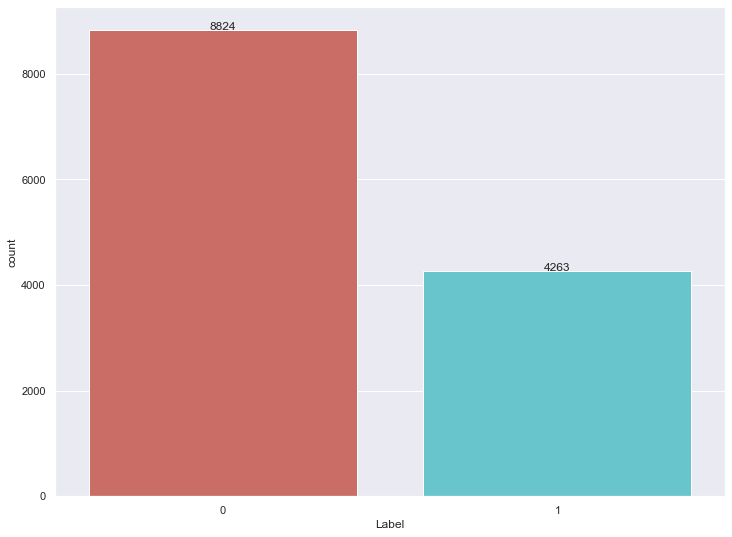

In [70]:
chart=sns.countplot(x='Label', data = visual_df, palette = 'hls')
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.show()

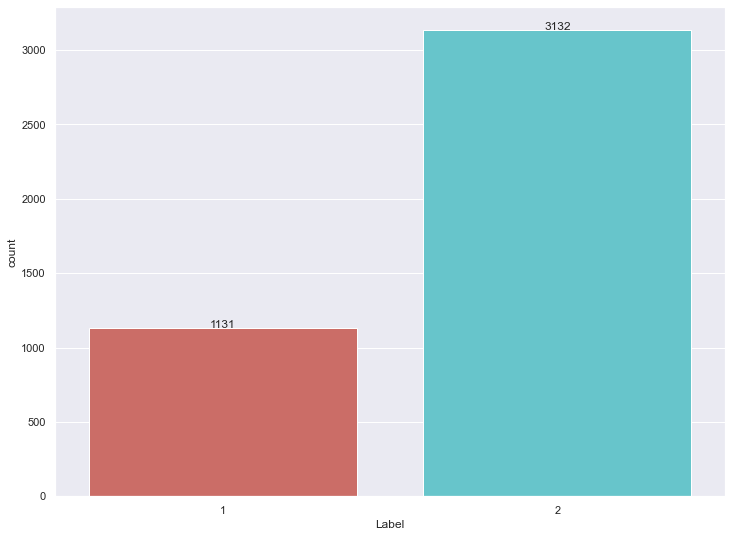

In [71]:
chart=sns.countplot(x='Label', data = visual_oneormore_df, palette = 'hls')
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.show()

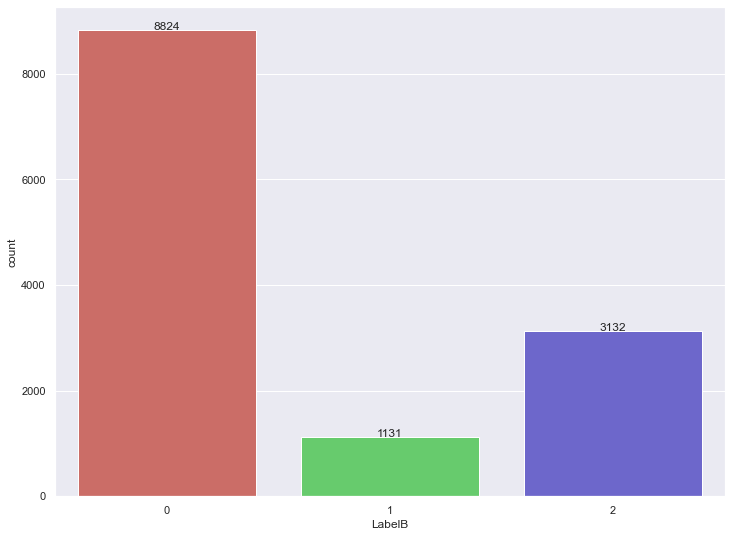

In [72]:
chart=sns.countplot(x='LabelB', data = visual_df, palette = 'hls')
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.show()

In [73]:
visual_df.groupby('Label').mean().transpose()

Label,0,1
pet_id,9.243970e+18,9.272885e+18
pet_order_number_max,3.790231e+00,3.979357e+00
kibble_kcal_mean,1.945878e+04,1.568513e+04
wet_food_discount_percent_mean,NaN,2.268832e-01
total_minutes_on_website_since_last_order_mean,7.641442e+01,9.577453e+01
number_of_pets_in_house_mean,1.345875e+00,1.328876e+00
communication_max,1.874433e-01,2.444288e-01
days_before_closing_max,1.511264e+02,1.507295e+02
wet_dry_cal_ratio_mean,0.000000e+00,2.178565e-01
wet_food_order_number_max,NaN,3.106498e+00


Text(0, 0.5, 'Number of Pets')

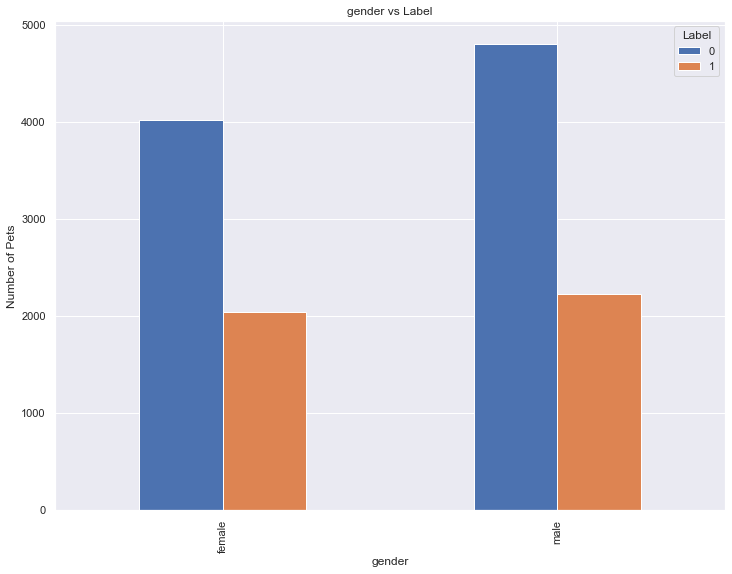

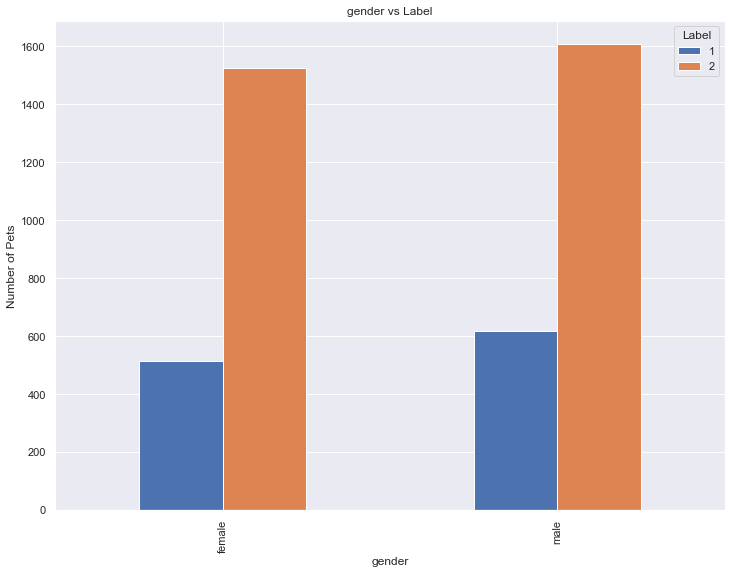

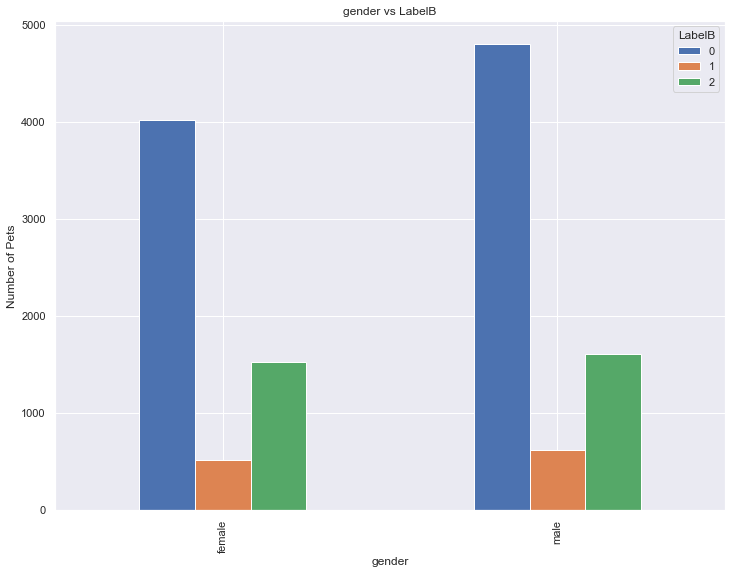

In [74]:
pd.crosstab(visual_df.gender,visual_df.Label).plot(kind='bar')
plt.title('gender vs Label')
plt.xlabel('gender')
plt.ylabel('Number of Pets')


pd.crosstab(visual_df.gender,visual_oneormore_df.Label).plot(kind='bar')
plt.title('gender vs Label')
plt.xlabel('gender')
plt.ylabel('Number of Pets')



pd.crosstab(visual_df.gender,visual_df.LabelB).plot(kind='bar')
plt.title('gender vs LabelB')
plt.xlabel('gender')
plt.ylabel('Number of Pets')

Text(0, 0.5, 'Number of Pets')

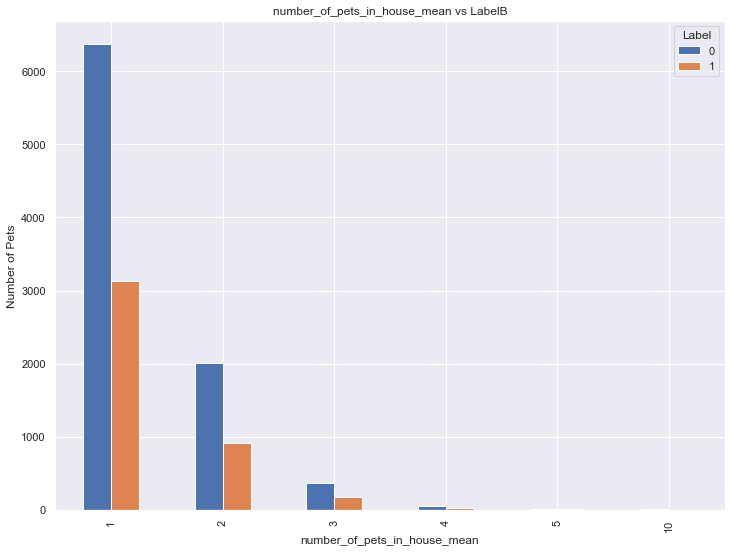

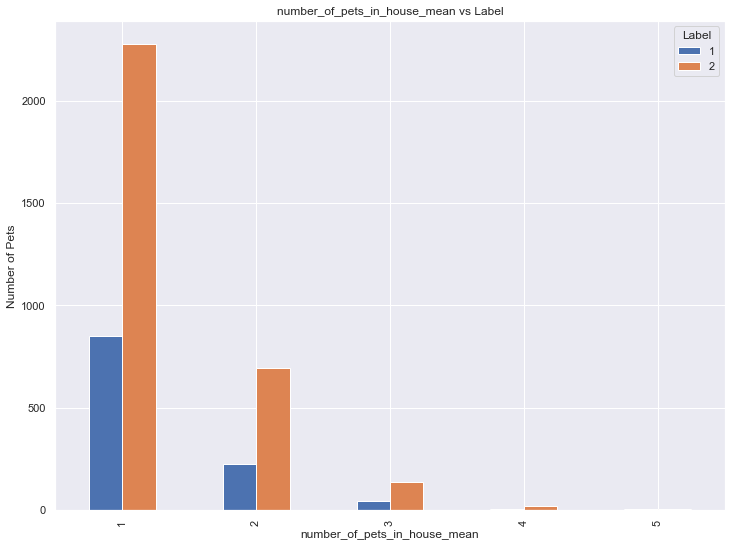

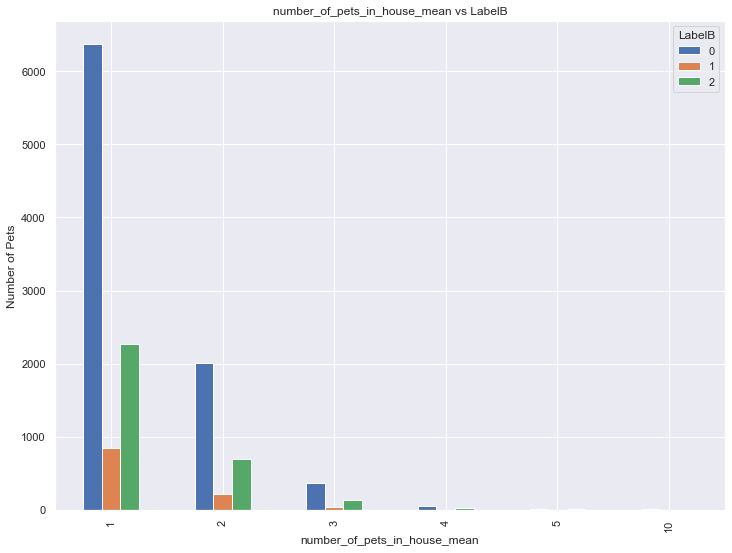

In [75]:
pd.crosstab(visual_df.number_of_pets_in_house_mean,visual_df.Label).plot(kind='bar')
plt.title('number_of_pets_in_house_mean vs LabelB')
plt.xlabel('number_of_pets_in_house_mean')
plt.ylabel('Number of Pets')


pd.crosstab(visual_oneormore_df.number_of_pets_in_house_mean,visual_oneormore_df.Label).plot(kind='bar')
plt.title('number_of_pets_in_house_mean vs Label')
plt.xlabel('number_of_pets_in_house_mean')
plt.ylabel('Number of Pets')


pd.crosstab(visual_df.number_of_pets_in_house_mean,visual_df.LabelB).plot(kind='bar')
plt.title('number_of_pets_in_house_mean vs LabelB')
plt.xlabel('number_of_pets_in_house_mean')
plt.ylabel('Number of Pets')

Text(0, 0.5, 'Number of Pets')

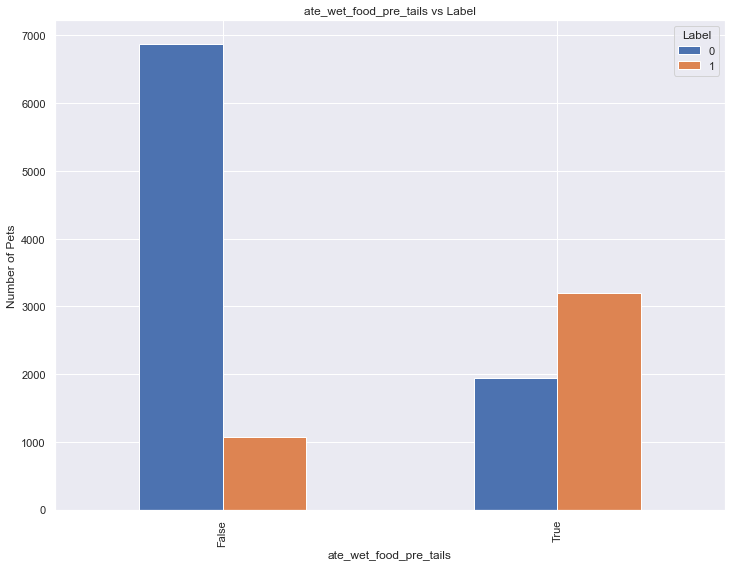

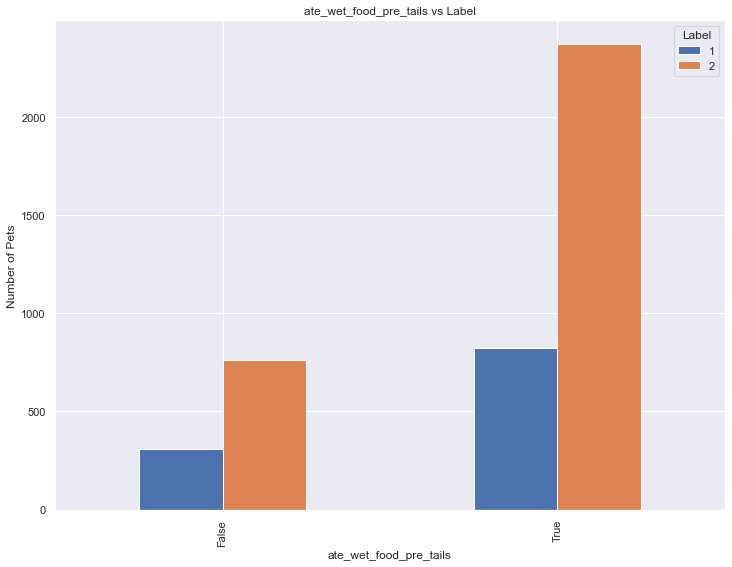

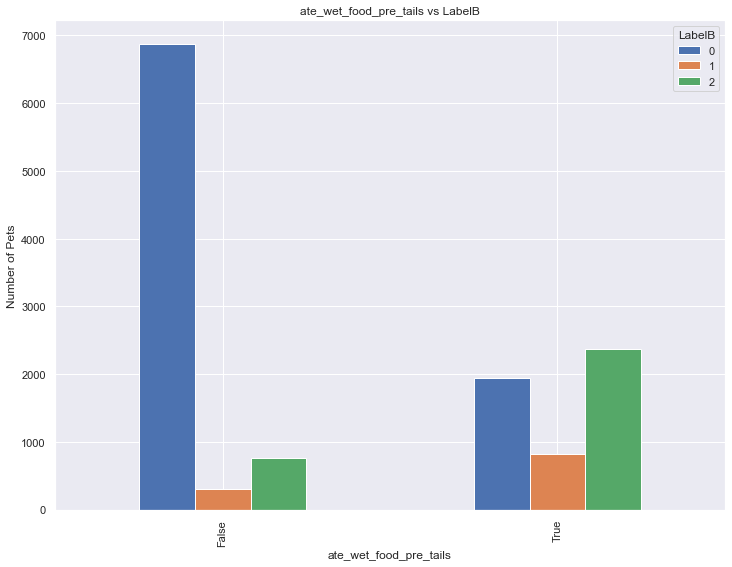

In [76]:
pd.crosstab(visual_df.ate_wet_food_pre_tails,visual_df.Label).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs Label')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')



pd.crosstab(visual_oneormore_df.ate_wet_food_pre_tails,visual_oneormore_df.Label).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs Label')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')



pd.crosstab(visual_df.ate_wet_food_pre_tails,visual_df.LabelB).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs LabelB')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')

Text(0, 0.5, 'Number of Pets')

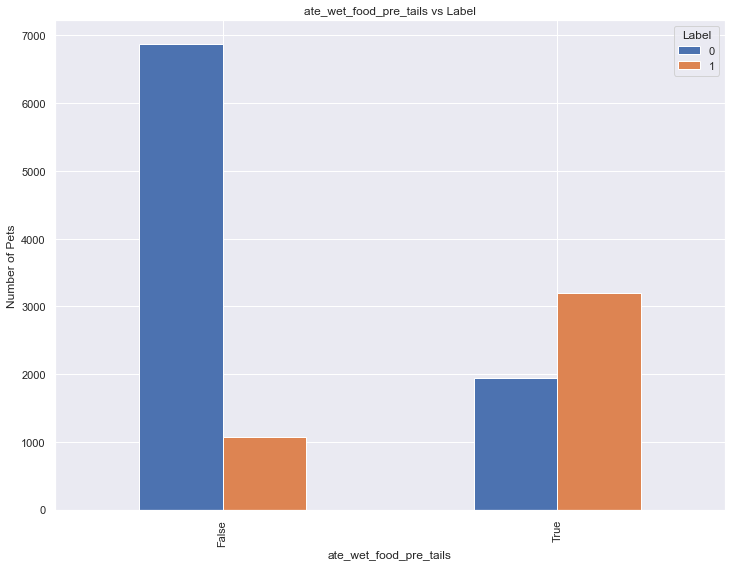

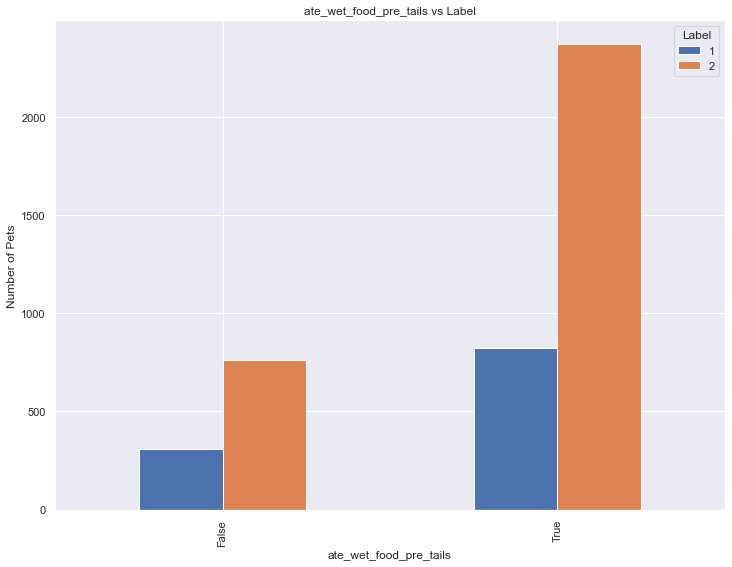

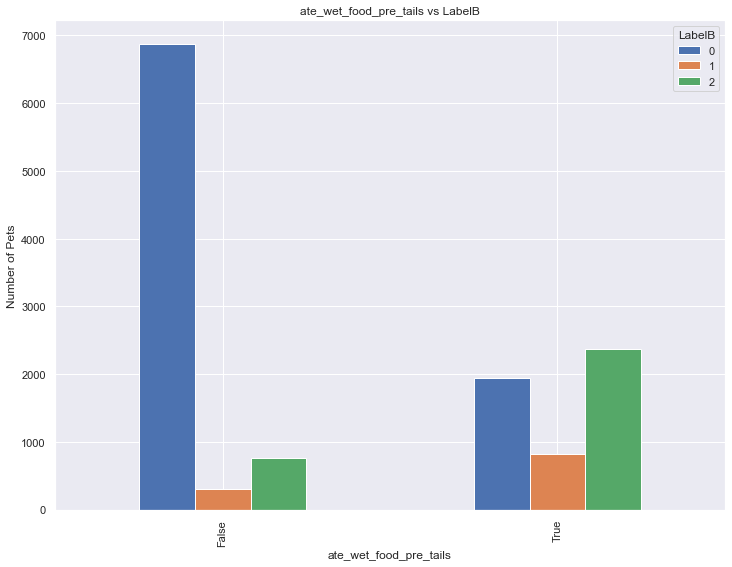

In [77]:
pd.crosstab(visual_df.ate_wet_food_pre_tails,visual_df.Label).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs Label')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.ate_wet_food_pre_tails,visual_oneormore_df.Label).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs Label')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.ate_wet_food_pre_tails,visual_df.LabelB).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs LabelB')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')

Text(0, 0.5, 'Number of Pets')

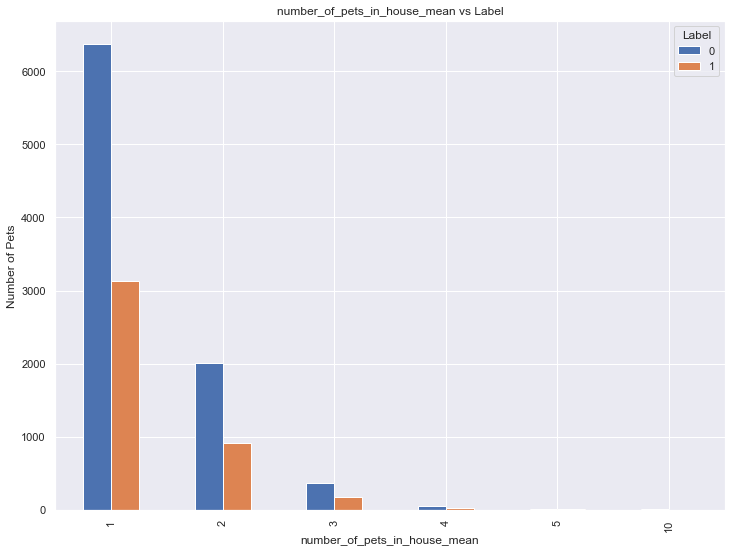

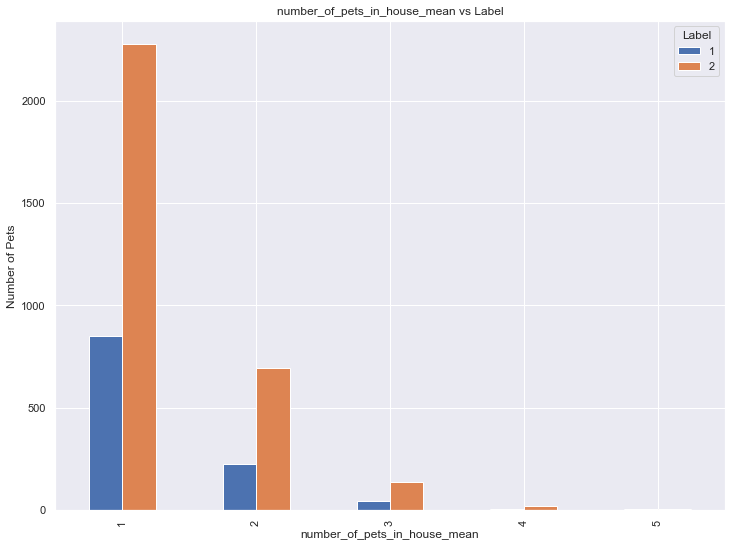

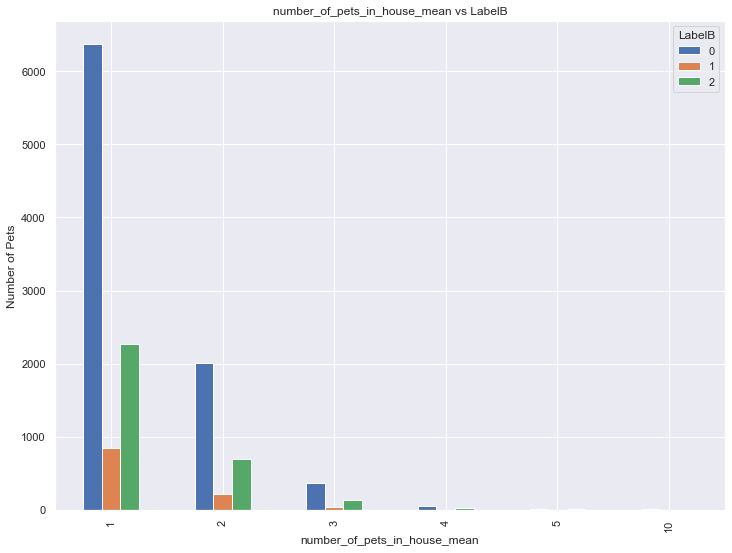

In [78]:
pd.crosstab(visual_df.number_of_pets_in_house_mean,visual_df.Label).plot(kind='bar')
plt.title('number_of_pets_in_house_mean vs Label')
plt.xlabel('number_of_pets_in_house_mean')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.number_of_pets_in_house_mean,visual_oneormore_df.Label).plot(kind='bar')
plt.title('number_of_pets_in_house_mean vs Label')
plt.xlabel('number_of_pets_in_house_mean')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.number_of_pets_in_house_mean,visual_df.LabelB).plot(kind='bar')
plt.title('number_of_pets_in_house_mean vs LabelB')
plt.xlabel('number_of_pets_in_house_mean')
plt.ylabel('Number of Pets')

In [79]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

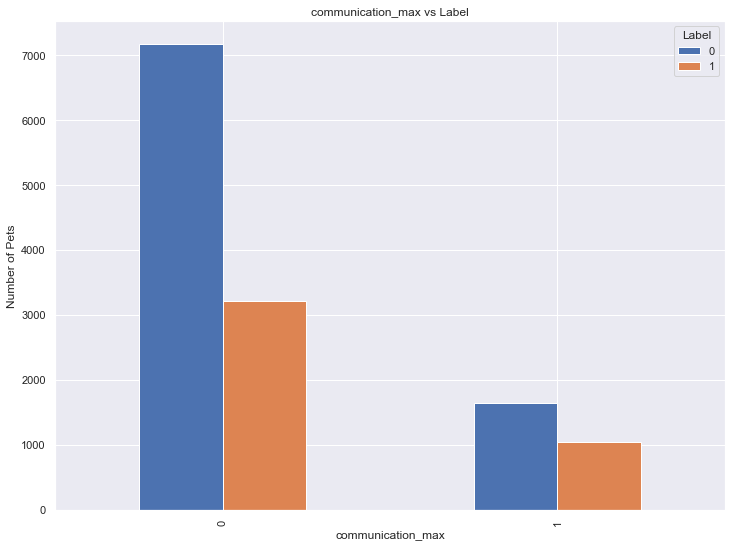

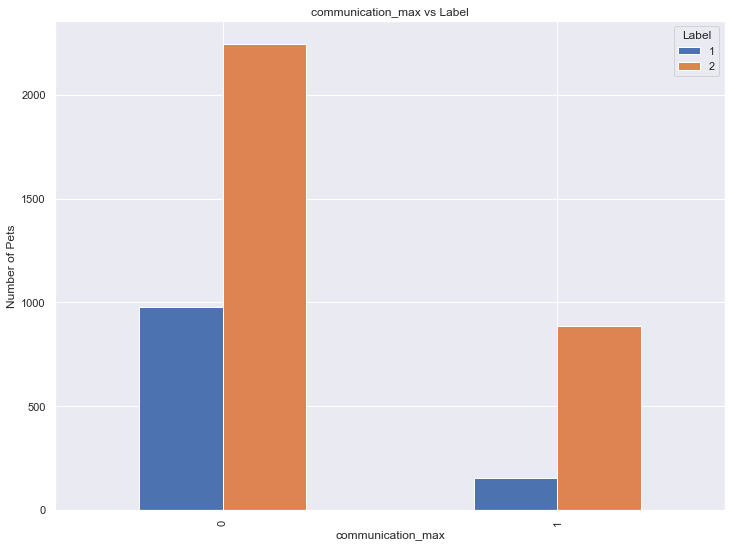

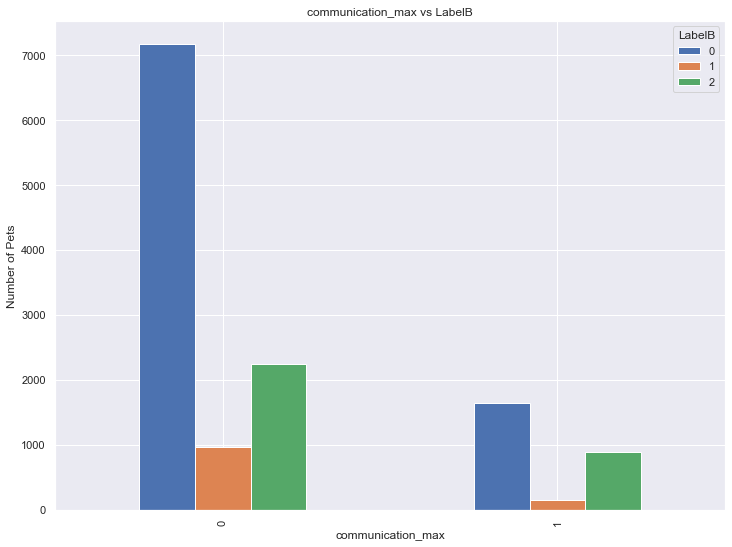

In [80]:
pd.crosstab(visual_df.communication_max,visual_df.Label).plot(kind='bar')
plt.title('communication_max vs Label')
plt.xlabel('communication_max')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.communication_max,visual_oneormore_df.Label).plot(kind='bar')
plt.title('communication_max vs Label')
plt.xlabel('communication_max')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.communication_max,visual_df.LabelB).plot(kind='bar')
plt.title('communication_max vs LabelB')
plt.xlabel('communication_max')
plt.ylabel('Number of Pets')

In [81]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

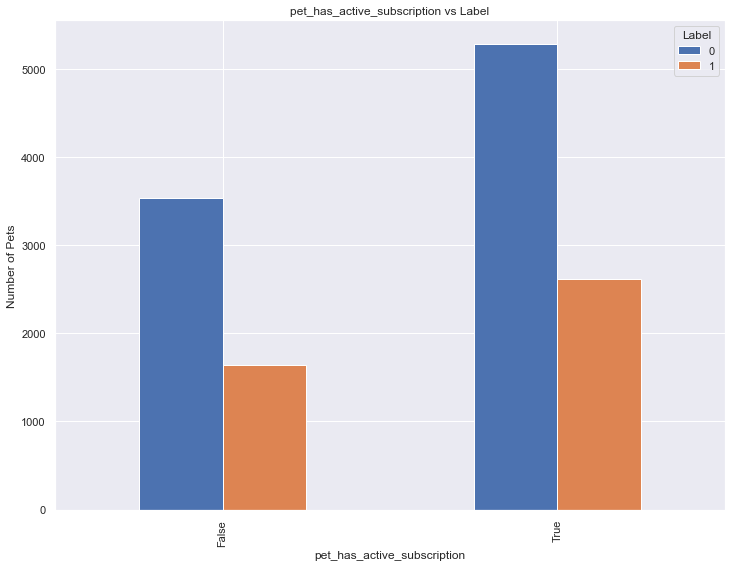

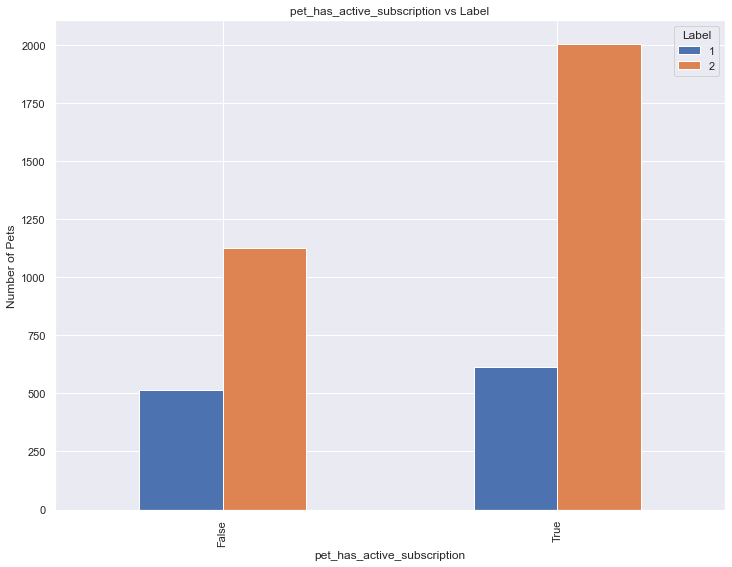

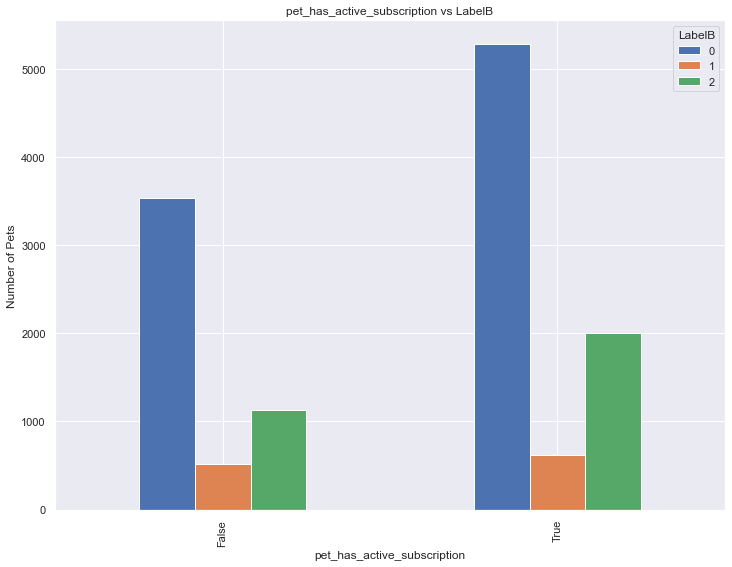

In [82]:
pd.crosstab(visual_df.pet_has_active_subscription,visual_df.Label).plot(kind='bar')
plt.title('pet_has_active_subscription vs Label')
plt.xlabel('pet_has_active_subscription')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.pet_has_active_subscription,visual_oneormore_df.Label).plot(kind='bar')
plt.title('pet_has_active_subscription vs Label')
plt.xlabel('pet_has_active_subscription')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.pet_has_active_subscription,visual_df.LabelB).plot(kind='bar')
plt.title('pet_has_active_subscription vs LabelB')
plt.xlabel('pet_has_active_subscription')
plt.ylabel('Number of Pets')

In [83]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

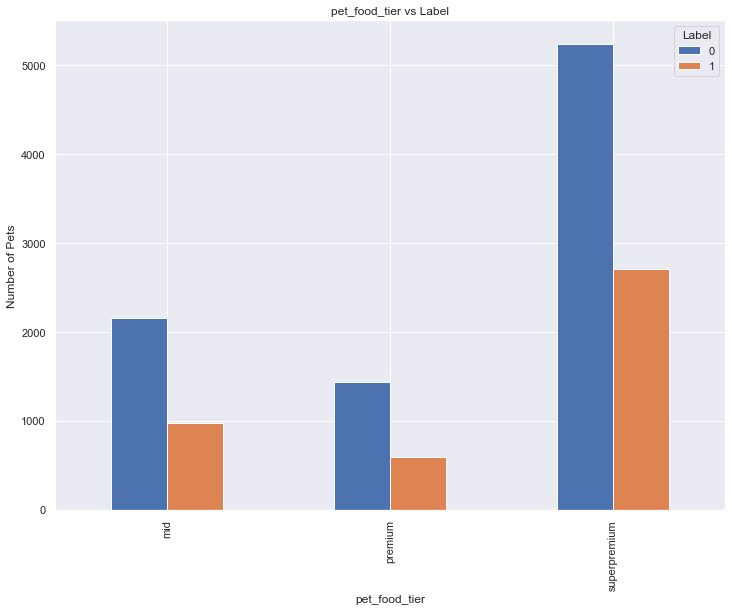

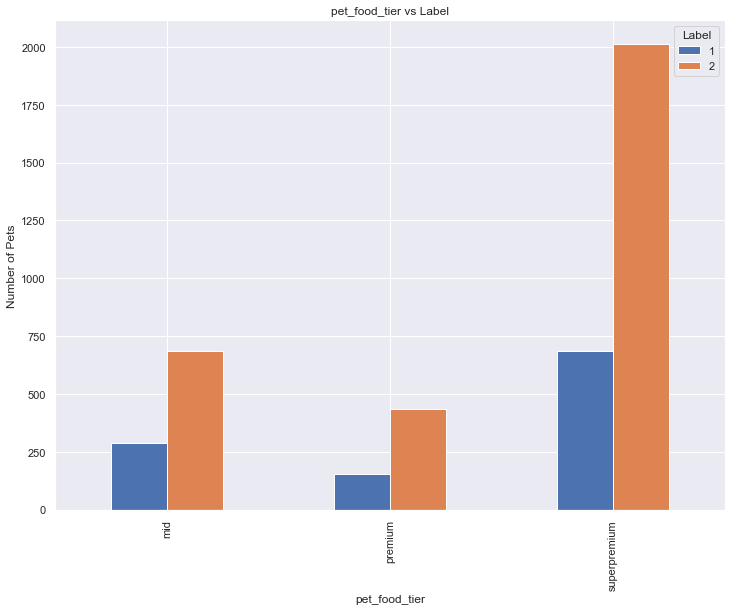

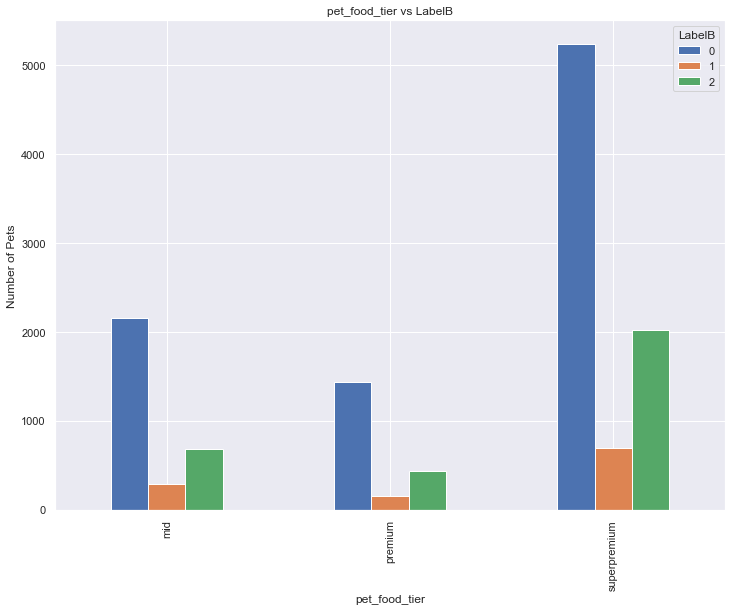

In [84]:
pd.crosstab(visual_df.pet_food_tier,visual_df.Label).plot(kind='bar')
plt.title('pet_food_tier vs Label')
plt.xlabel('pet_food_tier')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.pet_food_tier,visual_oneormore_df.Label).plot(kind='bar')
plt.title('pet_food_tier vs Label')
plt.xlabel('pet_food_tier')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.pet_food_tier,visual_df.LabelB).plot(kind='bar')
plt.title('pet_food_tier vs LabelB')
plt.xlabel('pet_food_tier')
plt.ylabel('Number of Pets')

In [85]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

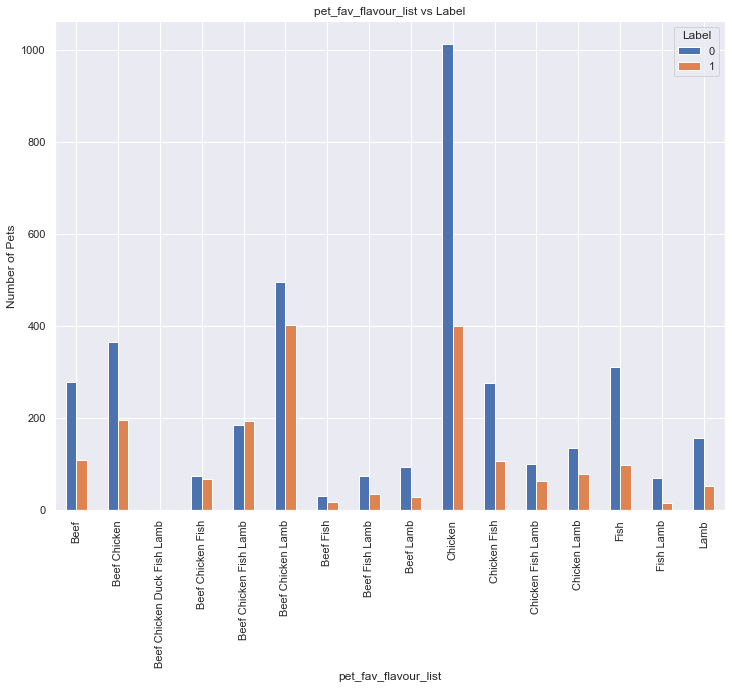

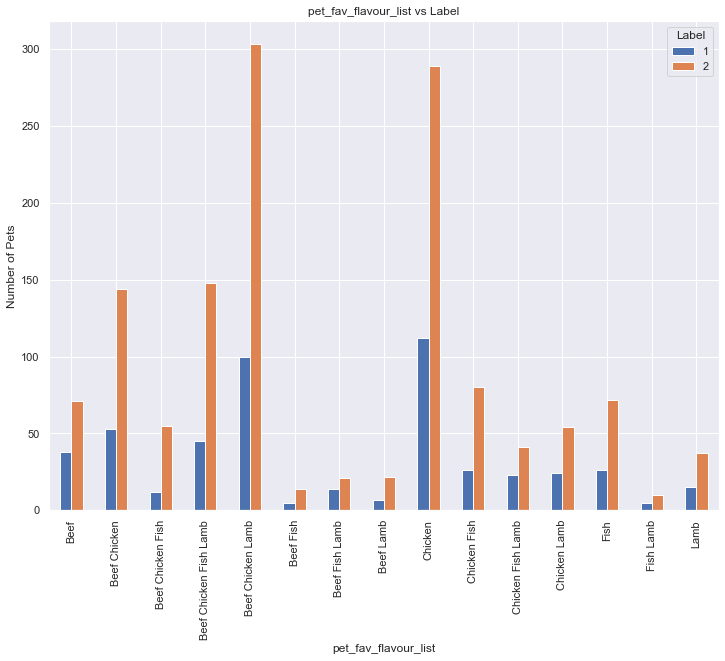

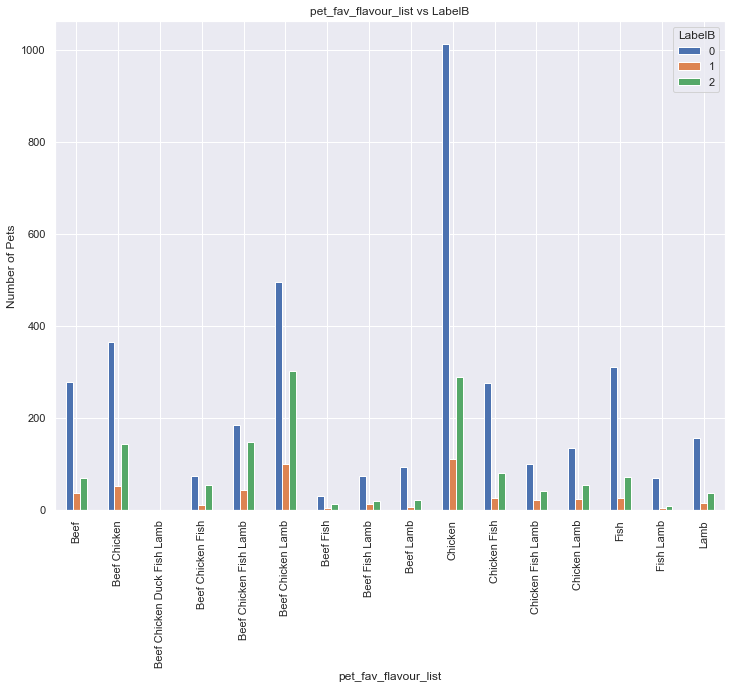

In [86]:
pd.crosstab(visual_df.pet_fav_flavour_list,visual_df.Label).plot(kind='bar')
plt.title('pet_fav_flavour_list vs Label')
plt.xlabel('pet_fav_flavour_list')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.pet_fav_flavour_list,visual_oneormore_df.Label).plot(kind='bar')
plt.title('pet_fav_flavour_list vs Label')
plt.xlabel('pet_fav_flavour_list')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.pet_fav_flavour_list,visual_df.LabelB).plot(kind='bar')
plt.title('pet_fav_flavour_list vs LabelB')
plt.xlabel('pet_fav_flavour_list')
plt.ylabel('Number of Pets')

In [87]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

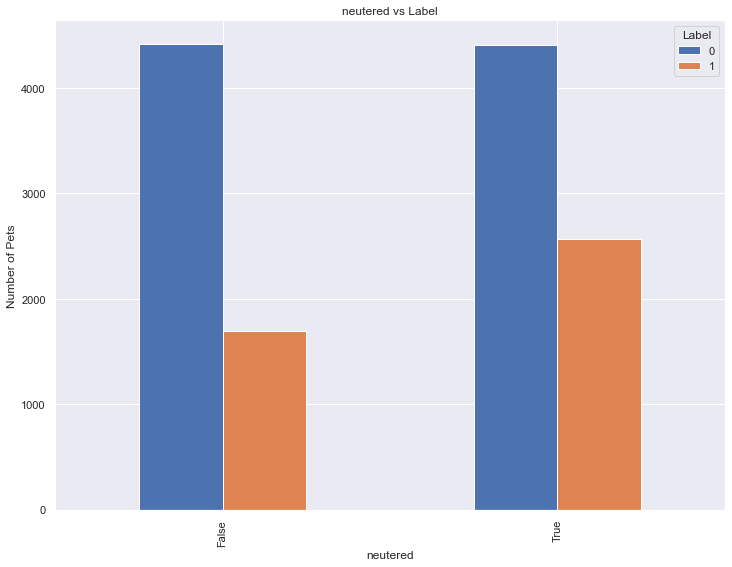

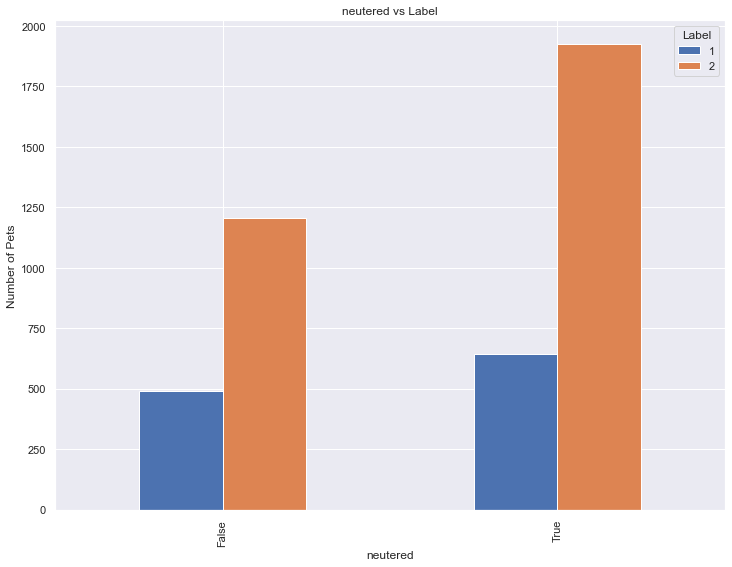

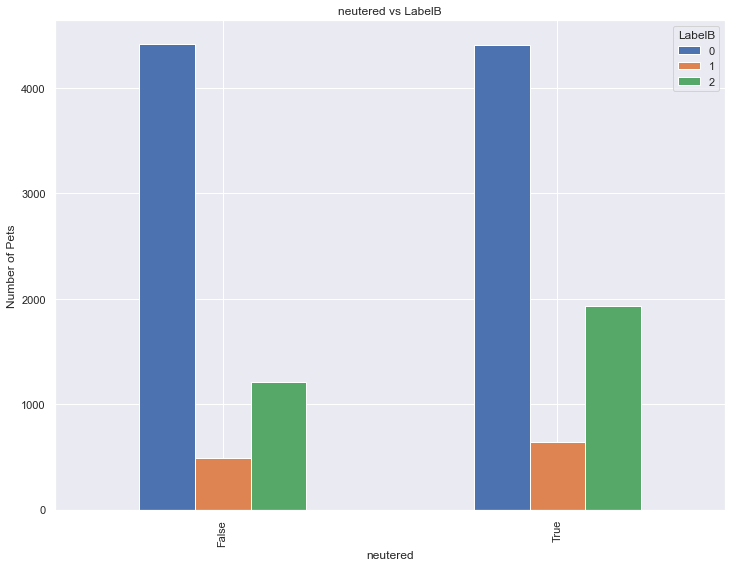

In [88]:
pd.crosstab(visual_df.neutered,visual_df.Label).plot(kind='bar')
plt.title('neutered vs Label')
plt.xlabel('neutered')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.neutered,visual_oneormore_df.Label).plot(kind='bar')
plt.title('neutered vs Label')
plt.xlabel('neutered')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.neutered,visual_df.LabelB).plot(kind='bar')
plt.title('neutered vs LabelB')
plt.xlabel('neutered')
plt.ylabel('Number of Pets')

In [89]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

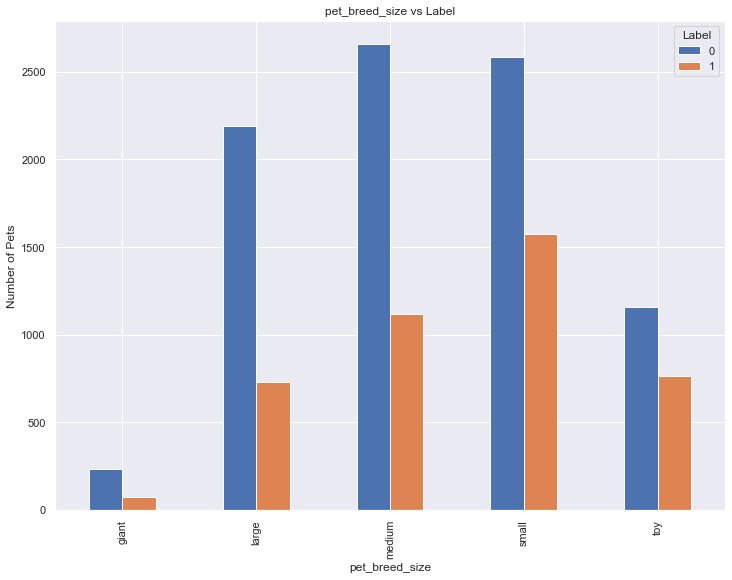

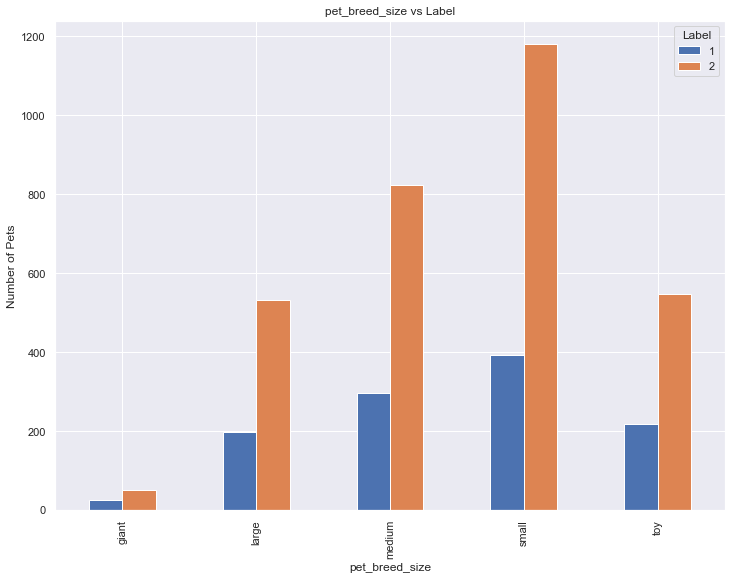

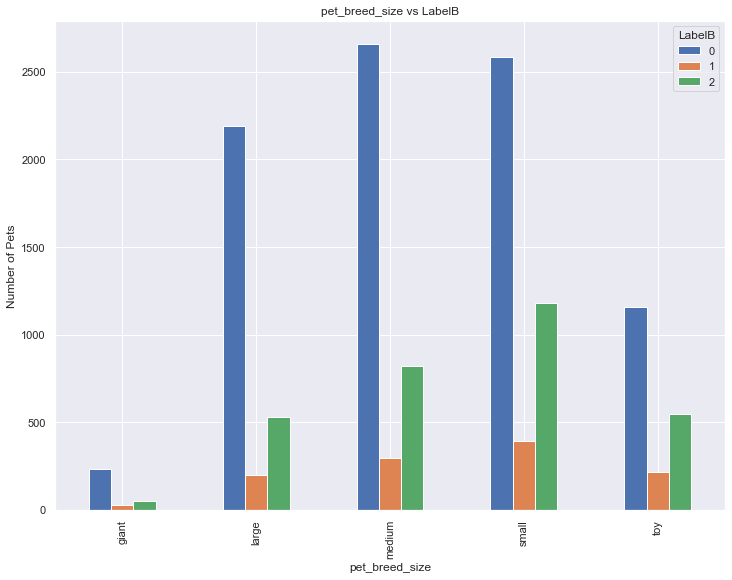

In [90]:
pd.crosstab(visual_df.pet_breed_size,visual_df.Label).plot(kind='bar')
plt.title('pet_breed_size vs Label')
plt.xlabel('pet_breed_size')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.pet_breed_size,visual_oneormore_df.Label).plot(kind='bar')
plt.title('pet_breed_size vs Label')
plt.xlabel('pet_breed_size')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.pet_breed_size,visual_df.LabelB).plot(kind='bar')
plt.title('pet_breed_size vs LabelB')
plt.xlabel('pet_breed_size')
plt.ylabel('Number of Pets')

In [91]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

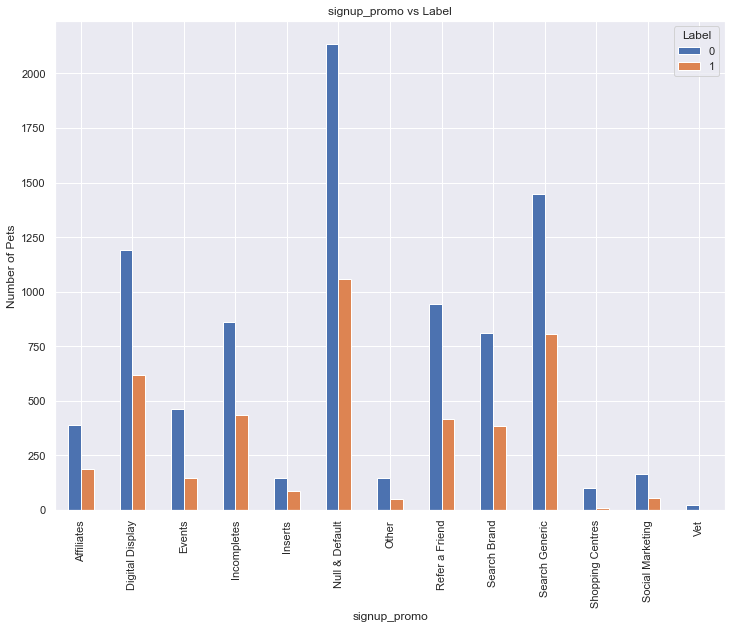

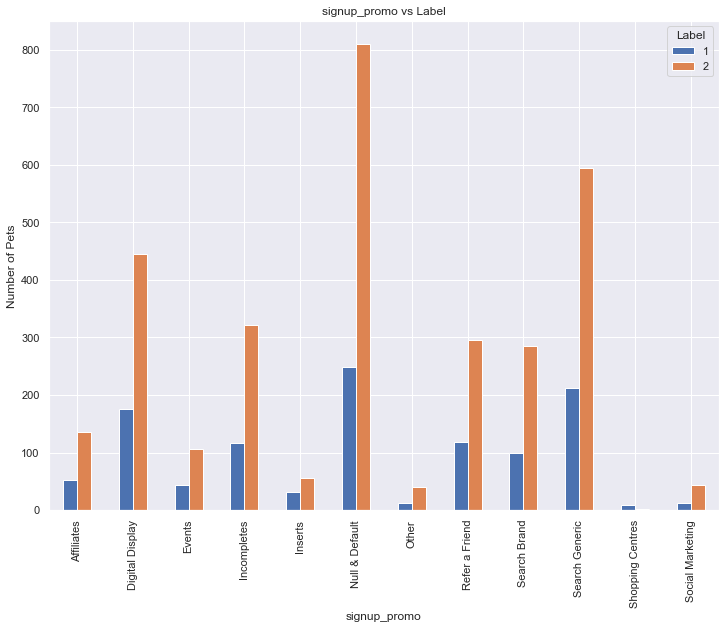

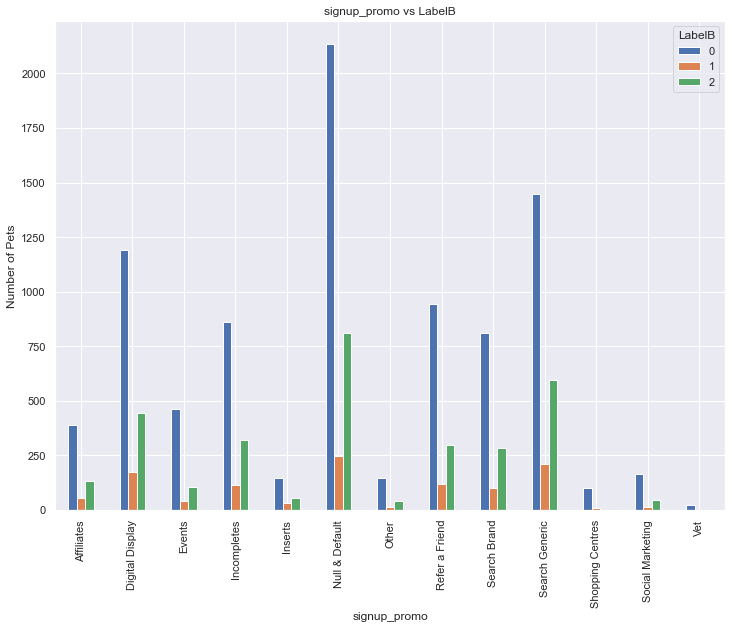

In [92]:
pd.crosstab(visual_df.signup_promo,visual_df.Label).plot(kind='bar')
plt.title('signup_promo vs Label')
plt.xlabel('signup_promo')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.signup_promo,visual_oneormore_df.Label).plot(kind='bar')
plt.title('signup_promo vs Label')
plt.xlabel('signup_promo')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.signup_promo,visual_df.LabelB).plot(kind='bar')
plt.title('signup_promo vs LabelB')
plt.xlabel('signup_promo')
plt.ylabel('Number of Pets')

In [93]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

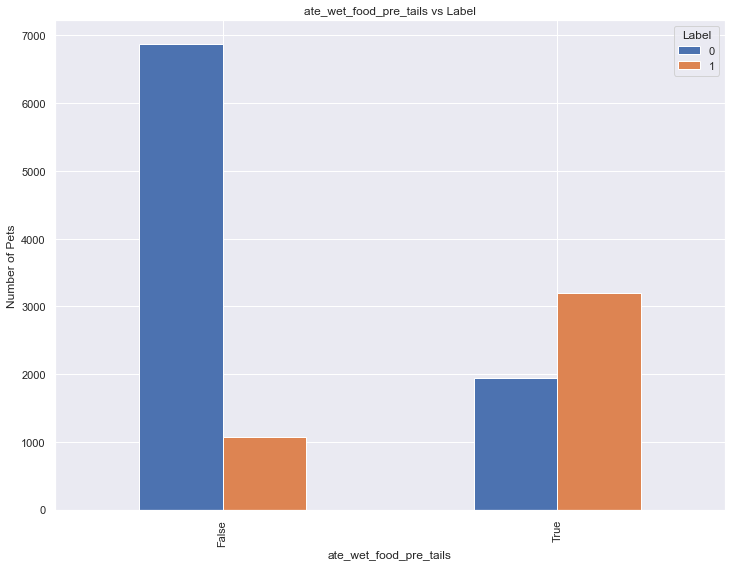

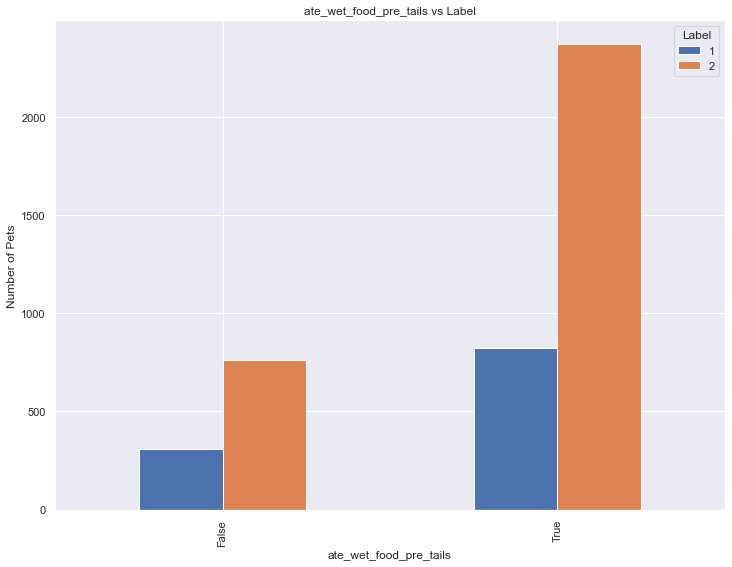

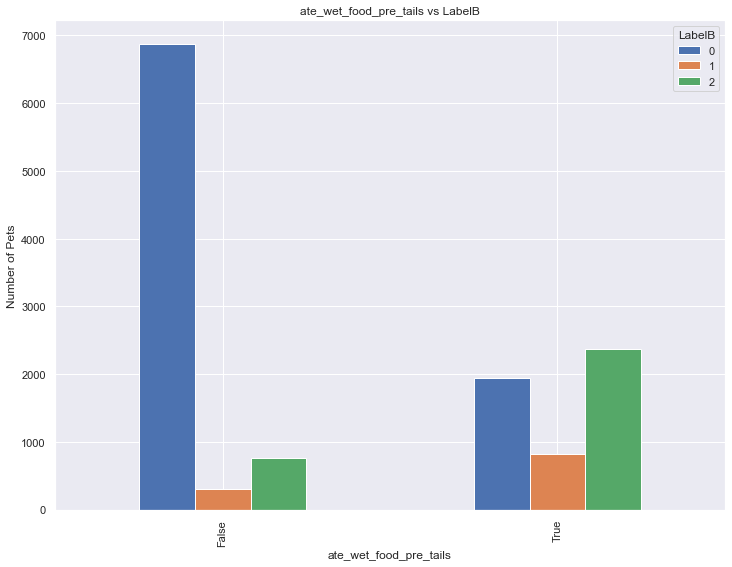

In [94]:
pd.crosstab(visual_df.ate_wet_food_pre_tails,visual_df.Label).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs Label')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.ate_wet_food_pre_tails,visual_oneormore_df.Label).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs Label')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.ate_wet_food_pre_tails,visual_df.LabelB).plot(kind='bar')
plt.title('ate_wet_food_pre_tails vs LabelB')
plt.xlabel('ate_wet_food_pre_tails')
plt.ylabel('Number of Pets')

In [95]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Number of Pets')

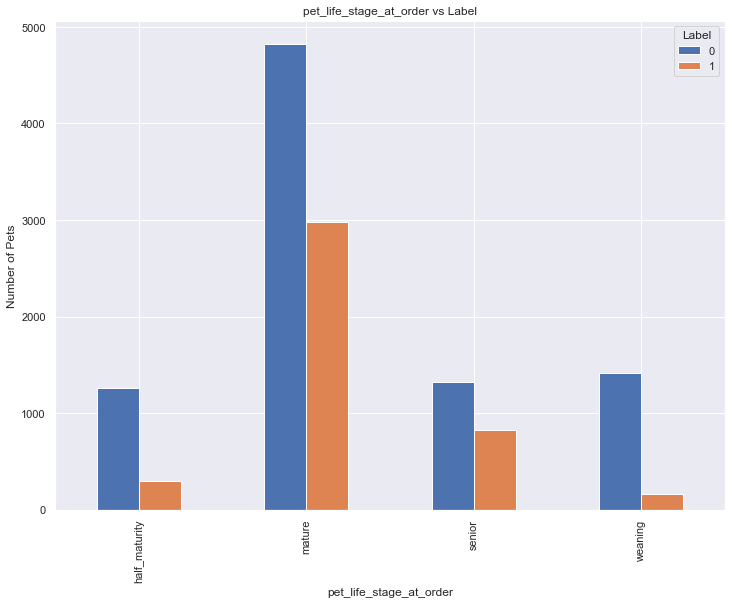

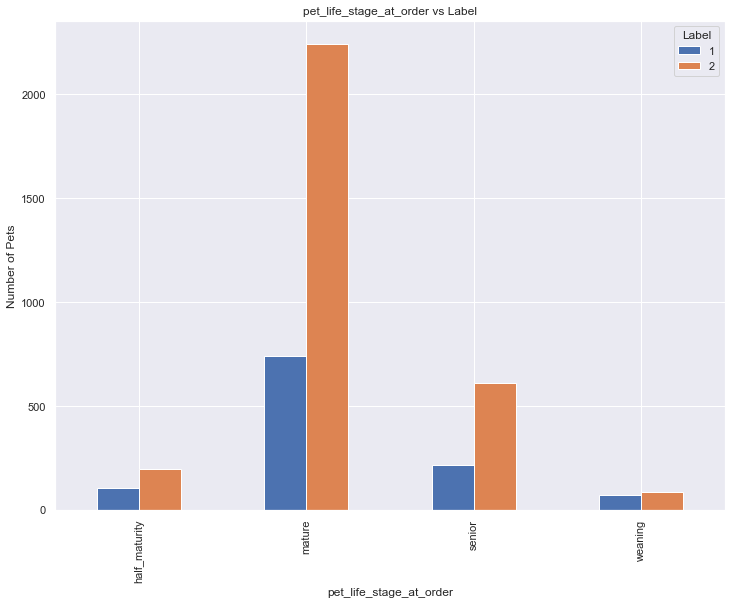

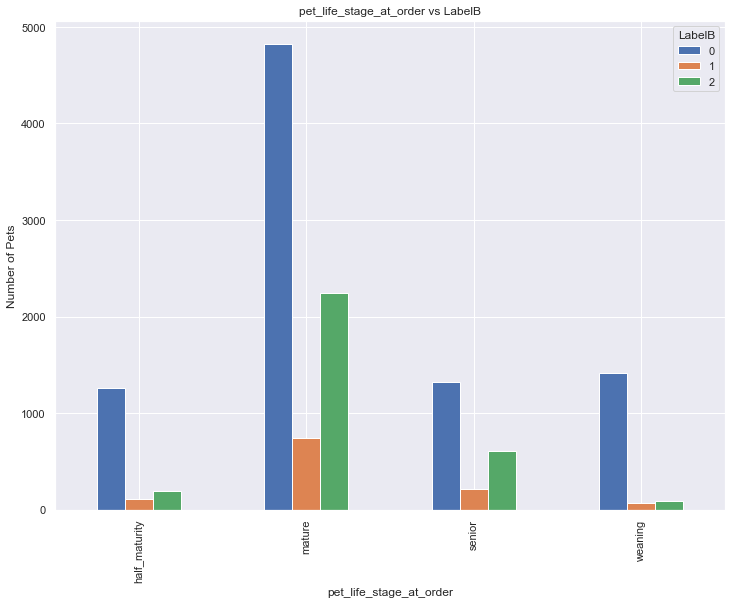

In [96]:
pd.crosstab(visual_df.pet_life_stage_at_order,visual_df.Label).plot(kind='bar')
plt.title('pet_life_stage_at_order vs Label')
plt.xlabel('pet_life_stage_at_order')
plt.ylabel('Number of Pets')

pd.crosstab(visual_oneormore_df.pet_life_stage_at_order,visual_oneormore_df.Label).plot(kind='bar')
plt.title('pet_life_stage_at_order vs Label')
plt.xlabel('pet_life_stage_at_order')
plt.ylabel('Number of Pets')

pd.crosstab(visual_df.pet_life_stage_at_order,visual_df.LabelB).plot(kind='bar')
plt.title('pet_life_stage_at_order vs LabelB')
plt.xlabel('pet_life_stage_at_order')
plt.ylabel('Number of Pets')

In [97]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Frequency')

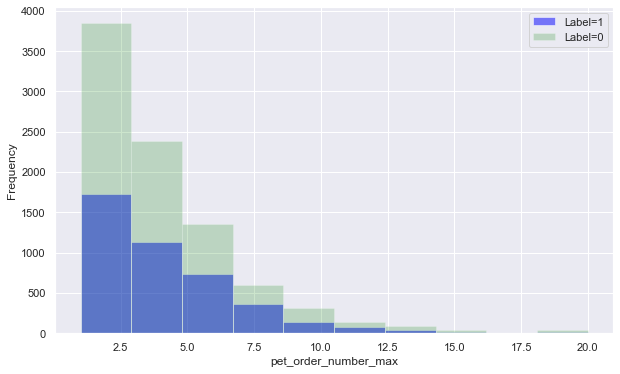

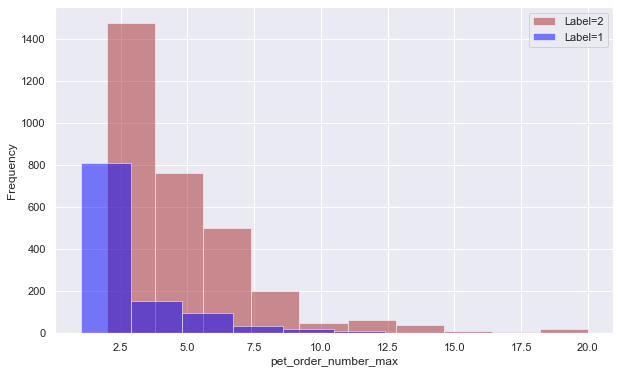

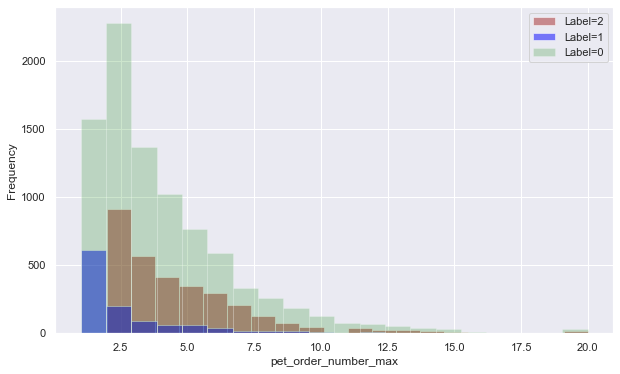

In [98]:
# interpretation: the longer the clinet stays with the company (higher number of orders, the higher the probability of buying wet food)

plt.figure(figsize=(10,6))
visual_df[visual_df['Label']==1]['pet_order_number_max'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Label=1')
visual_df[visual_df['Label']==0]['pet_order_number_max'].hist(alpha=0.2,color='green',
                                              bins=10,label='Label=0')
plt.legend()
plt.xlabel('pet_order_number_max')
plt.ylabel('Frequency')




plt.figure(figsize=(10,6))
visual_oneormore_df[visual_oneormore_df['Label']==2]['pet_order_number_max'].hist(alpha=0.5,color='brown',
                                              bins=10,label='Label=2')
visual_oneormore_df[visual_oneormore_df['Label']==1]['pet_order_number_max'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Label=1')
plt.legend()
plt.xlabel('pet_order_number_max')
plt.ylabel('Frequency')




plt.figure(figsize=(10,6))
visual_df[visual_df['LabelB']==2]['pet_order_number_max'].hist(alpha=0.5,color='brown',
                                              bins=20,label='Label=2')
visual_df[visual_df['LabelB']==1]['pet_order_number_max'].hist(alpha=0.5,color='blue',
                                              bins=20,label='Label=1')
visual_df[visual_df['LabelB']==0]['pet_order_number_max'].hist(alpha=0.2,color='green',
                                              bins=20,label='Label=0')
plt.legend()
plt.xlabel('pet_order_number_max')
plt.ylabel('Frequency')

In [99]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Frequency')

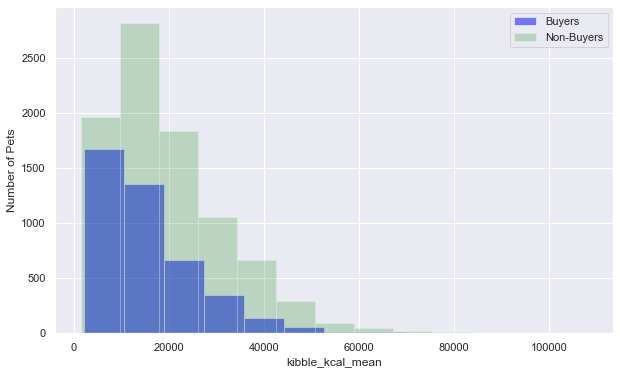

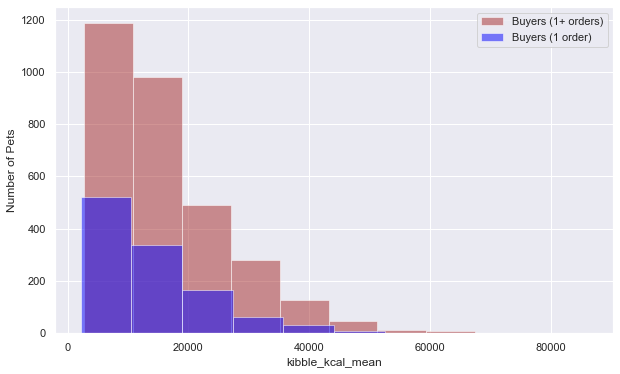

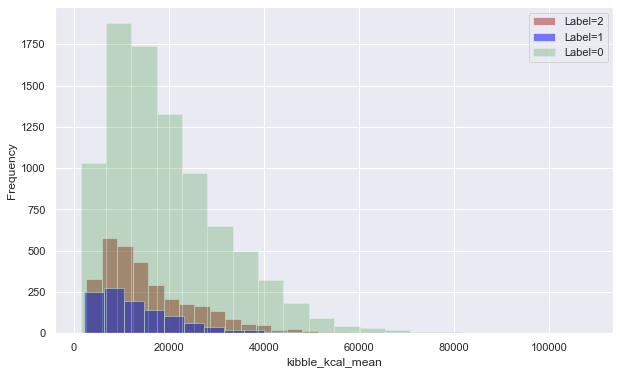

In [100]:
plt.figure(figsize=(10,6))
visual_df[visual_df['Label']==1]['kibble_kcal_mean'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Buyers')
visual_df[visual_df['Label']==0]['kibble_kcal_mean'].hist(alpha=0.2,color='green',
                                              bins=13,label='Non-Buyers')
plt.legend()
plt.xlabel('kibble_kcal_mean')
plt.ylabel('Number of Pets')




plt.figure(figsize=(10,6))
visual_oneormore_df[visual_oneormore_df['Label']==2]['kibble_kcal_mean'].hist(alpha=0.5,color='brown',
                                              bins=8,label='Buyers (1+ orders)')
visual_oneormore_df[visual_oneormore_df['Label']==1]['kibble_kcal_mean'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Buyers (1 order)')
plt.legend()
plt.xlabel('kibble_kcal_mean')
plt.ylabel('Number of Pets')




plt.figure(figsize=(10,6))
visual_df[visual_df['LabelB']==2]['kibble_kcal_mean'].hist(alpha=0.5,color='brown',
                                              bins=20,label='Label=2')
visual_df[visual_df['LabelB']==1]['kibble_kcal_mean'].hist(alpha=0.5,color='blue',
                                              bins=20,label='Label=1')
visual_df[visual_df['LabelB']==0]['kibble_kcal_mean'].hist(alpha=0.2,color='green',
                                              bins=20,label='Label=0')
plt.legend()
plt.xlabel('kibble_kcal_mean')
plt.ylabel('Frequency')

In [101]:
visual_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'Label', 'LabelB'],
      dtype='object')

Text(0, 0.5, 'Frequency')

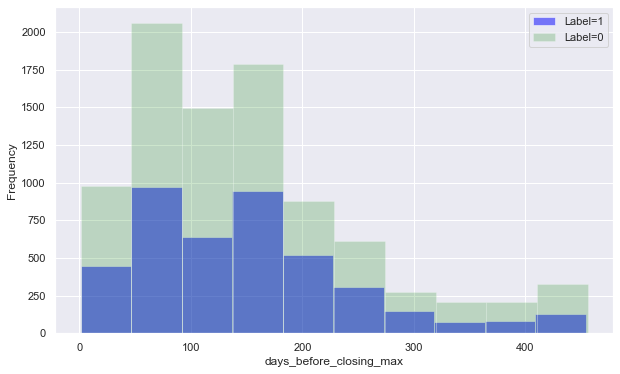

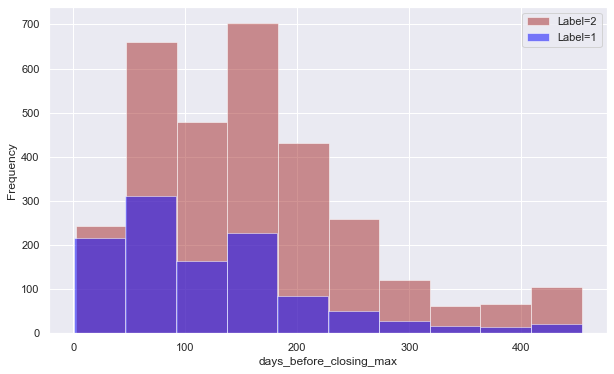

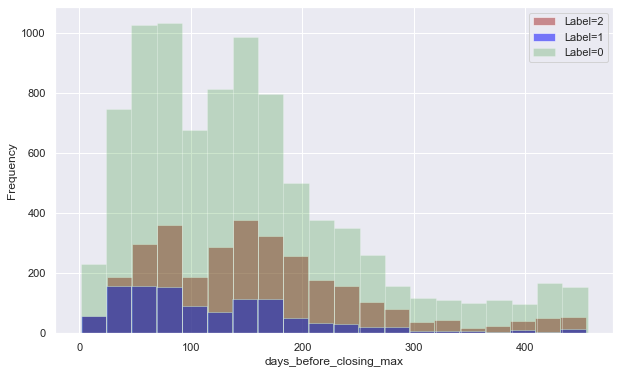

In [102]:
plt.figure(figsize=(10,6))
visual_df[visual_df['Label']==1]['days_before_closing_max'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Label=1')
visual_df[visual_df['Label']==0]['days_before_closing_max'].hist(alpha=0.2,color='green',
                                              bins=10,label='Label=0')
plt.legend()
plt.xlabel('days_before_closing_max')
plt.ylabel('Frequency')




plt.figure(figsize=(10,6))
visual_oneormore_df[visual_oneormore_df['Label']==2]['days_before_closing_max'].hist(alpha=0.5,color='brown',
                                              bins=10,label='Label=2')
visual_oneormore_df[visual_oneormore_df['Label']==1]['days_before_closing_max'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Label=1')
plt.legend()
plt.xlabel('days_before_closing_max')
plt.ylabel('Frequency')




plt.figure(figsize=(10,6))
visual_df[visual_df['LabelB']==2]['days_before_closing_max'].hist(alpha=0.5,color='brown',
                                              bins=20,label='Label=2')
visual_df[visual_df['LabelB']==1]['days_before_closing_max'].hist(alpha=0.5,color='blue',
                                              bins=20,label='Label=1')
visual_df[visual_df['LabelB']==0]['days_before_closing_max'].hist(alpha=0.2,color='green',
                                              bins=20,label='Label=0')
plt.legend()
plt.xlabel('days_before_closing_max')
plt.ylabel('Frequency')

<a id='dataprepmodel'></a>
# MODELLING
## Prepare Data before Implementing Feature Selection Methods
- We aggregated transactional/numerical data for each pet into numbers_df earlier and catetegorical data of pets in category_df
- We will now dummify categorical data in category_df, then aggregate that for each pet
- Then we will merge the categorical and numerical data

In [103]:
numbers_df.head()

,pet_id,pet_order_number_max,kibble_kcal_mean,wet_food_discount_percent_mean,total_minutes_on_website_since_last_order_mean,number_of_pets_in_house_mean,communication_max,days_before_closing_max,wet_dry_cal_ratio_mean,wet_food_order_number_max
0,362965707402215,1,6198.344,NaN,0.000,1,0,54.0,0.00,NaN
1,706834797910282,4,11028.579,NaN,1.000,1,0,125.0,0.00,NaN
2,2956959132340850,1,2398.968,NaN,496.000,1,0,165.0,0.00,NaN
3,3456354353280655,4,24311.125,0.0,3.000,1,0,78.0,0.02,2.0
4,4037557184041398,8,13807.700,NaN,0.125,2,0,204.0,0.00,NaN


In [104]:
category_df.head()

,pet_id,pet_has_active_subscription,pet_food_tier,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,neutered,gender,pet_breed_size,signup_promo,ate_wet_food_pre_tails,dry_food_brand_pre_tails,pet_life_stage_at_order
0,362965707402215,False,superpremium,NaN,Chicken,NaN,True,male,toy,Affiliates,True,Other / Autres,mature
1,706834797910282,False,superpremium,NaN,Beef Chicken,NaN,False,male,toy,Incompletes,False,More,mature
2,2956959132340850,False,superpremium,NaN,Chicken,digestion,False,male,medium,Search Generic,True,NaN,weaning
3,3456354353280655,True,premium,NaN,Chicken,NaN,True,male,medium,Digital Display,False,Bakers,mature
4,4037557184041398,False,premium,NaN,NaN,NaN,True,male,small,Null & Default,False,Asda Hero,mature


In [105]:
#dummify categorical variables
dummy_df = pd.get_dummies(category_df, 
                             columns=['pet_has_active_subscription', 'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list', 
                    'pet_health_issue_list', 'neutered', 'gender','pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
                    'dry_food_brand_pre_tails', 'pet_life_stage_at_order'], 
                             drop_first = False)

In [106]:
dummy_df.head()

,pet_id,pet_has_active_subscription_False,pet_has_active_subscription_True,pet_food_tier_mid,pet_food_tier_premium,pet_food_tier_superpremium,pet_allergen_list_beef,pet_allergen_list_beef chicken,pet_allergen_list_beef chicken dairy egg,pet_allergen_list_beef chicken dairy egg fish soya wheat,...,dry_food_brand_pre_tails_Wellness,dry_food_brand_pre_tails_Westcotts,dry_food_brand_pre_tails_Wild Elements,dry_food_brand_pre_tails_Wilson's,dry_food_brand_pre_tails_Wolfworthy,dry_food_brand_pre_tails_Yarrah,pet_life_stage_at_order_half_maturity,pet_life_stage_at_order_mature,pet_life_stage_at_order_senior,pet_life_stage_at_order_weaning
0,362965707402215,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,706834797910282,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2956959132340850,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3456354353280655,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4037557184041398,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Merge the two tables (agrregated transactional data and dummified profile/categorical data)

In [107]:
transformed_df = pd.merge(numbers_df, dummy_df, on='pet_id')
transformed_df.head().T

,0,1,2,3,4
pet_id,3.629657e+14,7.068348e+14,2.956959e+15,3.456354e+15,4.037557e+15
pet_order_number_max,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,8.000000e+00
kibble_kcal_mean,6.198344e+03,1.102858e+04,2.398968e+03,2.431112e+04,1.380770e+04
wet_food_discount_percent_mean,NaN,NaN,NaN,0.000000e+00,NaN
total_minutes_on_website_since_last_order_mean,0.000000e+00,1.000000e+00,4.960000e+02,3.000000e+00,1.250000e-01
...,...,...,...,...,...
dry_food_brand_pre_tails_Yarrah,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pet_life_stage_at_order_half_maturity,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pet_life_stage_at_order_mature,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
pet_life_stage_at_order_senior,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [108]:
transformed_df.shape

(13087, 410)

## Data Labelling of final dataframes prior to modelling 
### (above data labelling was for the visual_df, the dataframe used for visualisations)
- Create 2 tables: 
- (1) pet orders table no-wet-food-orders/at-least-one-wet-food-order
- (2) pet orders table one-wet-food-order/multiple-wet_food_orders

In [109]:
# (Table 1) pet orders table no-wet-food-orders/at-least-one-wet-food-order
transformed_df['Label'] = np.where(transformed_df['wet_food_order_number_max'] > 0, 1, 0)

In [110]:
# (Table 2) pet orders table one-wet-food-order/multiple-wet_food_orders
wet_food_df = transformed_df[transformed_df['Label']==1]

In [111]:
del wet_food_df['Label']

In [112]:
wet_food_df['Label'] = np.where(wet_food_df['wet_food_order_number_max'] > 1, 2, 1)
# Label '2' meaning 2 or more wet food orders

/Users/jr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Some correlation analysis below which can sometimes be used for feature selection as well

In [113]:
transformed_df.corr()['wet_food_order_number_max'].sort_values(ascending=False)

wet_food_order_number_max                 1.000000
pet_order_number_max                      0.763324
days_before_closing_max                   0.541660
communication_max                         0.261211
wet_dry_cal_ratio_mean                    0.196182
                                            ...   
dry_food_brand_pre_tails_Wafcol                NaN
dry_food_brand_pre_tails_Wild Elements         NaN
dry_food_brand_pre_tails_Wolfworthy            NaN
dry_food_brand_pre_tails_Yarrah                NaN
Label                                          NaN
Name: wet_food_order_number_max, Length: 411, dtype: float64

In [114]:
transformed_df.corr()['wet_food_order_number_max'].sort_values(ascending=True)

wet_food_discount_percent_mean            -0.495103
pet_has_active_subscription_False         -0.151221
pet_life_stage_at_order_half_maturity     -0.100491
neutered_False                            -0.082341
dry_food_brand_pre_tails_Other / Autres   -0.073529
                                             ...   
dry_food_brand_pre_tails_Wafcol                 NaN
dry_food_brand_pre_tails_Wild Elements          NaN
dry_food_brand_pre_tails_Wolfworthy             NaN
dry_food_brand_pre_tails_Yarrah                 NaN
Label                                           NaN
Name: wet_food_order_number_max, Length: 411, dtype: float64

In [115]:
wet_food_df.corr()['wet_food_order_number_max'].sort_values(ascending=False)

wet_food_order_number_max                 1.000000
pet_order_number_max                      0.763324
days_before_closing_max                   0.541660
Label                                     0.538919
communication_max                         0.261211
                                            ...   
dry_food_brand_pre_tails_Salters               NaN
dry_food_brand_pre_tails_Wafcol                NaN
dry_food_brand_pre_tails_Wild Elements         NaN
dry_food_brand_pre_tails_Wolfworthy            NaN
dry_food_brand_pre_tails_Yarrah                NaN
Name: wet_food_order_number_max, Length: 411, dtype: float64

In [116]:
wet_food_df.corr()['wet_food_order_number_max'].sort_values(ascending=True)

wet_food_discount_percent_mean            -0.495103
pet_has_active_subscription_False         -0.151221
pet_life_stage_at_order_half_maturity     -0.100491
neutered_False                            -0.082341
dry_food_brand_pre_tails_Other / Autres   -0.073529
                                             ...   
dry_food_brand_pre_tails_Salters                NaN
dry_food_brand_pre_tails_Wafcol                 NaN
dry_food_brand_pre_tails_Wild Elements          NaN
dry_food_brand_pre_tails_Wolfworthy             NaN
dry_food_brand_pre_tails_Yarrah                 NaN
Name: wet_food_order_number_max, Length: 411, dtype: float64

In [117]:
# now we can delete the column that lets us decide data labels
del transformed_df['wet_food_order_number_max']
del wet_food_df['wet_food_order_number_max']

In [118]:
numbers_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max'],
      dtype='object')

In [119]:
# furthermore we delete a couple more columns from transformed_df because these variables are not appropriate as explanatory variables for zero-wet-orders/some-wet-orders classification
del transformed_df['wet_food_discount_percent_mean']
del transformed_df['wet_dry_cal_ratio_mean']

# The above two explanatory variables are kept in wet_food_df table since they are relevant variables in one-wet-order/more-wet-orders classification

In [120]:
transformed_df.sample(9).T

,4044,509,8470,4915,8420,8030,10523,3796,10048
pet_id,5.753099e+18,7.232437e+17,1.201695e+19,7.012160e+18,1.193948e+19,1.141501e+19,1.476373e+19,5.416188e+18,1.412407e+19
pet_order_number_max,6.000000e+00,2.000000e+00,5.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00
kibble_kcal_mean,1.147683e+04,2.220641e+04,1.702114e+04,3.023554e+04,1.018067e+04,2.067441e+04,3.383160e+04,6.594599e+03,5.108935e+03
total_minutes_on_website_since_last_order_mean,5.280000e+01,0.000000e+00,9.760000e+01,3.150000e+01,2.500000e-01,1.700000e+01,2.666667e+00,2.040000e+02,1.000000e+00
number_of_pets_in_house_mean,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...,...
pet_life_stage_at_order_half_maturity,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pet_life_stage_at_order_mature,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
pet_life_stage_at_order_senior,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
pet_life_stage_at_order_weaning,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00


In [121]:
wet_food_df.head()

,pet_id,pet_order_number_max,kibble_kcal_mean,wet_food_discount_percent_mean,total_minutes_on_website_since_last_order_mean,number_of_pets_in_house_mean,communication_max,days_before_closing_max,wet_dry_cal_ratio_mean,pet_has_active_subscription_False,...,dry_food_brand_pre_tails_Westcotts,dry_food_brand_pre_tails_Wild Elements,dry_food_brand_pre_tails_Wilson's,dry_food_brand_pre_tails_Wolfworthy,dry_food_brand_pre_tails_Yarrah,pet_life_stage_at_order_half_maturity,pet_life_stage_at_order_mature,pet_life_stage_at_order_senior,pet_life_stage_at_order_weaning,Label
3,3456354353280655,4,24311.1250,0.000000,3.0,1,0,78.0,0.020,0,...,0,0,0,0,0,0,1,0,0,2
6,10537078672488177,2,19941.0050,0.250000,0.0,1,0,20.0,0.140,0,...,0,0,0,0,0,0,1,0,0,2
8,13664233144377703,5,3983.1294,0.100000,342.2,2,0,137.0,0.432,0,...,0,0,0,0,0,0,1,0,0,2
10,14046098795759798,3,3871.5230,0.249977,1.5,1,1,155.0,0.465,0,...,0,0,0,0,0,0,1,0,0,2
13,18316556878949000,2,7775.6025,0.250000,0.0,1,0,61.0,0.175,1,...,0,0,0,0,0,0,1,0,0,2


In [122]:
transformed_df.groupby('Label').size()
# Figures consistent with earlier analysis

Label
0    8824
1    4263
dtype: int64

In [123]:
wet_food_df.groupby('Label').size()
# Figures consistent with earlier analysis

Label
1    1131
2    3132
dtype: int64

In [124]:
transformed_df.columns[transformed_df.isnull().any()].tolist()

[]

In [125]:
wet_food_df.columns[wet_food_df.isnull().any()].tolist()

# Discount does not show any missing values because all wet-order-numbers either show a discount value or a 0. not a NaN. It shows NaN only when the wet-order-number shows NaN 

[]

## Balancing labelled data (time permitting)

In [126]:
transformed_df.groupby('Label').size()
# imbalanced data. we need to take out half of examples labelled with 0. otherwise the algorithm will train itself more on '0' examples and then 
# the algorithm will be able to predict 0s more easily than the 1s. That will impact Recall. If time permits balance the data

Label
0    8824
1    4263
dtype: int64

## Scaling of columns like kibble_kcal and days_before_closing_max (time permitting)

In [127]:
numbers_df['kibble_kcal_mean'].describe()

count     13087.000000
mean      18229.537412
std       11883.838761
min        1481.660000
25%        9435.313333
50%       15225.129000
75%       24405.758500
max      108097.879000
Name: kibble_kcal_mean, dtype: float64

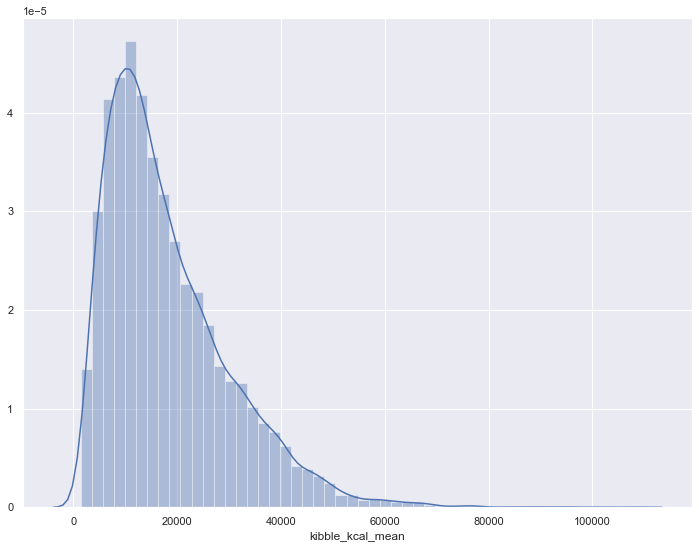

In [128]:
sns.distplot(numbers_df['kibble_kcal_mean'])

In [129]:
numbers_df.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'wet_food_order_number_max'],
      dtype='object')

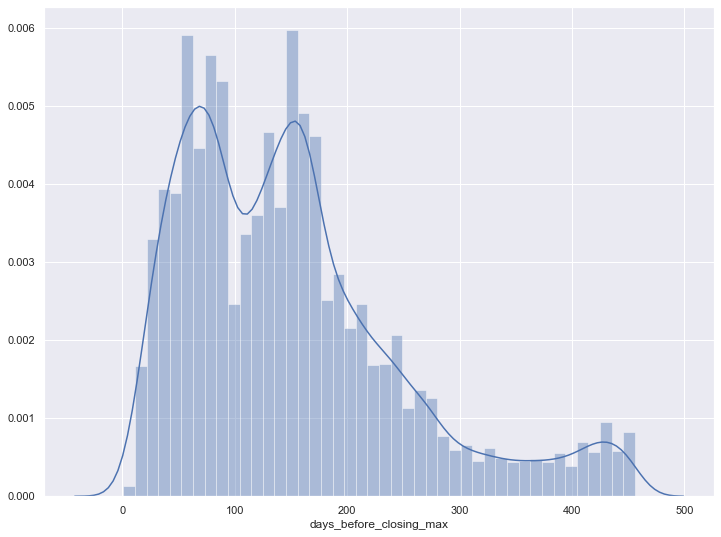

In [130]:
sns.distplot(numbers_df['days_before_closing_max'])

<a id='featureselectionmethods'></a>
# Feature Selection Methods

# feature importances

In [131]:
features = transformed_df[transformed_df.columns.difference(['Label','pet_id'])]

labels = transformed_df['Label']

- Keeping all data because we are not doing classification model yet. only getting feature importances

In [132]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

1.0


In [133]:
VI = pd.DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI

,index,RF
0,ate_wet_food_pre_tails_False,0.122010
1,ate_wet_food_pre_tails_True,0.102623
2,communication_max,0.010590
3,days_before_closing_max,0.066026
4,dry_food_brand_pre_tails_(I don't currently fe...,0.000513
...,...,...
401,signup_promo_Search Generic,0.010644
402,signup_promo_Shopping Centres,0.002245
403,signup_promo_Social Marketing,0.002212
404,signup_promo_Vet,0.000158


In [134]:
VI.sort_values(['RF'],ascending=0)[0:20]
# Get the top features from this list below

,index,RF
0,ate_wet_food_pre_tails_False,0.122010
1,ate_wet_food_pre_tails_True,0.102623
142,kibble_kcal_mean,0.084423
3,days_before_closing_max,0.066026
405,total_minutes_on_website_since_last_order_mean,0.062200
391,pet_order_number_max,0.039960
145,number_of_pets_in_house_mean,0.018105
390,pet_life_stage_at_order_weaning,0.017057
388,pet_life_stage_at_order_mature,0.016530
141,gender_male,0.012053


In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [136]:
pd.options.display.float_format = '{:.2f}'.format
chi_sq = pd.DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [137]:
chi_sq = chi_sq.reset_index()

In [138]:
chi_sq.sort_values('Chi_Square',ascending=0)[0:20]

,index,Chi_Square
142,kibble_kcal_mean,2245363.63
405,total_minutes_on_website_since_last_order_mean,13023.91
1,ate_wet_food_pre_tails_True,2045.69
0,ate_wet_food_pre_tails_False,1323.12
390,pet_life_stage_at_order_weaning,366.16
387,pet_life_stage_at_order_half_maturity,123.73
388,pet_life_stage_at_order_mature,112.21
185,pet_allergen_list_beef dairy egg soya wheat,78.88
347,pet_breed_size_large,76.37
143,neutered_False,65.38


## checking for multicollinearity uisng variance inflation factor (time permitting)

## Important Features: 

These below seem to be the important features

- Random Forest (Ate Wet Food Pre Tails, Kibble_kcal, Days before closing, Total minutes on website since last order, Pet order number)
- SelectKbest (Kibble_kcal, Total minutes on website since last order, Ate Wet Food Pre Tails, Pet Life Stage at Order, Breed Size)

In [139]:
transformed_df.corr()['Label'].sort_values(ascending=False)

Label                                    1.00
ate_wet_food_pre_tails_True              0.51
pet_life_stage_at_order_mature           0.15
neutered_True                            0.10
pet_breed_size_small                     0.08
                                         ... 
neutered_False                          -0.10
pet_life_stage_at_order_half_maturity   -0.10
kibble_kcal_mean                        -0.15
pet_life_stage_at_order_weaning         -0.18
ate_wet_food_pre_tails_False            -0.51
Name: Label, Length: 408, dtype: float64

In [140]:
transformed_df.corr()['Label'].sort_values(ascending=True)

ate_wet_food_pre_tails_False            -0.51
pet_life_stage_at_order_weaning         -0.18
kibble_kcal_mean                        -0.15
pet_life_stage_at_order_half_maturity   -0.10
neutered_False                          -0.10
                                         ... 
pet_breed_size_small                     0.08
neutered_True                            0.10
pet_life_stage_at_order_mature           0.15
ate_wet_food_pre_tails_True              0.51
Label                                    1.00
Name: Label, Length: 408, dtype: float64

<a id='models'></a>
# Models

In [141]:
classification_df = transformed_df[transformed_df.columns.difference(['pet_id'])]

In [142]:
classification_df.head().T

,0,1,2,3,4
Label,0.00,0.00,0.00,1.00,0.00
ate_wet_food_pre_tails_False,0.00,1.00,0.00,1.00,1.00
ate_wet_food_pre_tails_True,1.00,0.00,1.00,0.00,0.00
communication_max,0.00,0.00,0.00,0.00,0.00
days_before_closing_max,54.00,125.00,165.00,78.00,204.00
...,...,...,...,...,...
signup_promo_Search Generic,0.00,0.00,1.00,0.00,0.00
signup_promo_Shopping Centres,0.00,0.00,0.00,0.00,0.00
signup_promo_Social Marketing,0.00,0.00,0.00,0.00,0.00
signup_promo_Vet,0.00,0.00,0.00,0.00,0.00


In [143]:
features = transformed_df[transformed_df.columns.difference(['Label','pet_id'])]

labels = transformed_df['Label']

In [144]:
Class_Features = transformed_df.columns.difference(['Label','pet_id'])

In [145]:
Selected_Features = ['kibble_kcal_mean', 'total_minutes_on_website_since_last_order_mean', 'ate_wet_food_pre_tails_True', 
                     'pet_life_stage_at_order_mature', 'pet_order_number_max',
                     'number_of_pets_in_house_mean', 'days_before_closing_max']

In [146]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

train, test = train_test_split(classification_df, test_size = 0.4, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [147]:
features_train = train[Class_Features]
label_train = train['Label']
features_test = test[Class_Features]
label_test = test['Label']

## Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print("{:.2f}".format(accuracy_train),"{:.2f}".format(accuracy_test),"{:.2f}".format(auc_train),"{:.2f}".format(auc_test))

1.00 0.81 1.00 0.86


In [149]:
features.shape

(13087, 406)

In [150]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,5309,0
1,0,2543


In [151]:
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,3117,398
1,594,1126


In [152]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy Score')
print(accuracy_score(label_test, pred_test),'\n')

print('Precision Score')
print(precision_score(label_test, pred_test,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix(label_test, pred_test)
columns = ['Buyer','Not Buyer']  #to adapt to your classification problem
print(pd.DataFrame(array,columns = columns, index = columns),'\n')

print('Classification Report')
print(classification_report(label_test, pred_test),'\n')

Accuracy Score
0.8105062082139446 

Precision Score
[0.83993533 0.73884514] 

Confusion Matrix
           Buyer  Not Buyer
Buyer       3117        398
Not Buyer    594       1126 

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3515
           1       0.74      0.65      0.69      1720

    accuracy                           0.81      5235
   macro avg       0.79      0.77      0.78      5235
weighted avg       0.81      0.81      0.81      5235
 



### Doing classification with limited feature columns now

In [153]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

train, test = train_test_split(classification_df, test_size = 0.3, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [154]:
features_train = train[Selected_Features]
label_train = train['Label']
features_test = test[Selected_Features]
label_test = test['Label']

In [155]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print("{:.2f}".format(accuracy_train),"{:.2f}".format(accuracy_test),"{:.2f}".format(auc_train),"{:.2f}".format(auc_test))

1.00 0.77 1.00 0.81


# Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
lrclf = LogisticRegression()

lrclf.fit(features_train,label_train)

pred_train = lrclf.predict(features_train)
pred_test = lrclf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), lrclf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), lrclf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print("{:.2f}".format(accuracy_train),"{:.2f}".format(accuracy_test),"{:.2f}".format(auc_train),"{:.2f}".format(auc_test))

0.76 0.76 0.79 0.79


# Decision tree classifier

In [157]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(features_train, label_train)
# predict train set
pred_train=tree.predict(features_train)
# predict test set
pred_test=tree.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), tree.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), tree.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print("{:.2f}".format(accuracy_train),"{:.2f}".format(accuracy_test),"{:.2f}".format(auc_train),"{:.2f}".format(auc_test))

1.00 0.69 1.00 0.65


<a id='secondmodel'></a>
# Model for 1order/1+orders classification

# feature importances for second classification

In [158]:
features = wet_food_df[wet_food_df.columns.difference(['Label','pet_id'])]


labels = wet_food_df['Label']

In [159]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

1.0


In [160]:
VII = pd.DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VII = VII.reset_index()
VII

,index,RF
0,ate_wet_food_pre_tails_False,0.01
1,ate_wet_food_pre_tails_True,0.01
2,communication_max,0.01
3,days_before_closing_max,0.04
4,dry_food_brand_pre_tails_(I don't currently fe...,0.00
...,...,...
403,signup_promo_Social Marketing,0.00
404,signup_promo_Vet,0.00
405,total_minutes_on_website_since_last_order_mean,0.06
406,wet_dry_cal_ratio_mean,0.08


In [161]:
VII.sort_values(['RF'],ascending=0)[0:30]
# Get the top 10 features from this list below

,index,RF
407,wet_food_discount_percent_mean,0.30
391,pet_order_number_max,0.20
406,wet_dry_cal_ratio_mean,0.08
405,total_minutes_on_website_since_last_order_mean,0.06
3,days_before_closing_max,0.04
142,kibble_kcal_mean,0.04
2,communication_max,0.01
145,number_of_pets_in_house_mean,0.01
141,gender_male,0.01
388,pet_life_stage_at_order_mature,0.01


In [162]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [163]:
pd.options.display.float_format = '{:.2f}'.format
chi_sq = pd.DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [164]:
chi_sq = chi_sq.reset_index()

In [165]:
chi_sq.sort_values('Chi_Square',ascending=0)[0:20]

,index,Chi_Square
142,kibble_kcal_mean,254216.71
3,days_before_closing_max,7371.95
405,total_minutes_on_website_since_last_order_mean,5361.07
391,pet_order_number_max,969.71
407,wet_food_discount_percent_mean,285.84
2,communication_max,75.03
390,pet_life_stage_at_order_weaning,29.38
370,pet_has_active_subscription_False,20.18
406,wet_dry_cal_ratio_mean,18.04
402,signup_promo_Shopping Centres,17.95


## pearson correlation

In [166]:
wet_food_df.corr()['Label'].sort_values(ascending=False)

Label                                    1.00
pet_order_number_max                     0.32
days_before_closing_max                  0.17
communication_max                        0.15
wet_dry_cal_ratio_mean                   0.14
                                         ... 
dry_food_brand_pre_tails_Salters          nan
dry_food_brand_pre_tails_Wafcol           nan
dry_food_brand_pre_tails_Wild Elements    nan
dry_food_brand_pre_tails_Wolfworthy       nan
dry_food_brand_pre_tails_Yarrah           nan
Name: Label, Length: 410, dtype: float64

In [167]:
wet_food_df.corr()['Label'].sort_values(ascending=True)

wet_food_discount_percent_mean           -0.58
pet_has_active_subscription_False        -0.09
pet_life_stage_at_order_weaning          -0.08
signup_promo_Shopping Centres            -0.06
pet_life_stage_at_order_half_maturity    -0.06
                                          ... 
dry_food_brand_pre_tails_Salters           nan
dry_food_brand_pre_tails_Wafcol            nan
dry_food_brand_pre_tails_Wild Elements     nan
dry_food_brand_pre_tails_Wolfworthy        nan
dry_food_brand_pre_tails_Yarrah            nan
Name: Label, Length: 410, dtype: float64

### Features that emarge after the above feature selection methods
- 'wet_food_discount_percent_mean','pet_order_number_max','wet_dry_cal_ratio_mean','total_minutes_on_website_since_last_order_mean',
                      'kibble_kcal_mean','communication_max','days_before_closing_max'

# Models for 1order/1+orders classification

In [168]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print("{:.2f}".format(accuracy_train),"{:.2f}".format(accuracy_test),"{:.2f}".format(auc_train),"{:.2f}".format(auc_test))

1.00 0.77 1.00 0.81


In [169]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,6173,0
1,0,2987


In [170]:
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,2259,392
1,511,765


In [171]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy Score')
print(accuracy_score(label_test, pred_test),'\n')

print('Precision Score')
print(precision_score(label_test, pred_test,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix(label_test, pred_test)
columns = ['Buyer1','Buyer1+']  #to adapt to your classification problem
print(pd.DataFrame(array,columns = columns, index = columns),'\n')

print('Classification Report')
print(classification_report(label_test, pred_test),'\n')

Accuracy Score
0.7700534759358288 

Precision Score
[0.81552347 0.66119274] 

Confusion Matrix
         Buyer1  Buyer1+
Buyer1     2259      392
Buyer1+     511      765 

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2651
           1       0.66      0.60      0.63      1276

    accuracy                           0.77      3927
   macro avg       0.74      0.73      0.73      3927
weighted avg       0.77      0.77      0.77      3927
 



## Running the algorithm using seleted features that emerged through the feature selection methods above

In [172]:
Selected_Features2 = ['wet_food_discount_percent_mean','pet_order_number_max','wet_dry_cal_ratio_mean','total_minutes_on_website_since_last_order_mean',
                      'kibble_kcal_mean','communication_max','days_before_closing_max']

In [173]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

train, test = train_test_split(wet_food_df, test_size = 0.3, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [174]:
features_train = train[Selected_Features2]
label_train = train['Label']
features_test = test[Selected_Features2]
label_test = test['Label']

In [175]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)


print("{:.2f}".format(accuracy_train),"{:.2f}".format(accuracy_test))

1.00 0.96
